![enter image description here][1]

**1. Introduction**
===================


  [1]: https://farm1.staticflickr.com/26/53529136_b13be27270_z_d.jpg?zz=1

The goal of this kernel is to learn more about the most popular men and women on speed dating events. Who are these people? What do they like? How do they spend their time? 

I also want to know more about people who are not desired on the dating market. What is the difference between them and popular men and women?

**2. Preparing data**
=====================

I created a new variable which measures in percentage how often a partner of a subject wanted to have a second date with him or her. 

In [1]:
library(ggplot2)
Dating = read.csv("../input/Speed Dating Data.csv")

#Creating a column with a number of dates of a subject
Freq = table(Dating$iid)
Freq = data.frame(Freq)
names(Freq)= c("iid", "NumOfDates")
Dating = merge(Dating, Freq, by = "iid")

#Creating a column informing in percentage how often a subject was chosen by a partner for a 
#second date
Pop = aggregate(Dating$dec, list(Dating$pid), sum)
names(Pop)= c("iid", "Popular")
Dating = merge(Dating, Pop, by = "iid")
Dating$PoPRel = Dating$Popular/Dating$NumOfDates * 100

#Replacing codes of races by string descriptions
Dating$race[Dating$race==1] = "African"
Dating$race[Dating$race==2] = "European"
Dating$race[Dating$race==3] = "Latino"
Dating$race[Dating$race==4] = "Asian"
Dating$race[Dating$race==5] = "Native"
Dating$race[Dating$race==6] = "Other"

#Creating a subsets with only men and women
Man = subset(Dating, gender == 1)
Woman = subset(Dating, gender == 0)

#Getting rid of duplicates
Woman = Woman[order(Woman$PoPRel, decreasing = TRUE),]
index <- which(duplicated(Woman$iid))
Woman = Woman[-index,]

Man = Man[order(Man$PoPRel,decreasing = TRUE),]
index <- which(duplicated(Man$iid))
Man = Man[-index,]

Man and women see other sex in a different way. Because of that I decided to split data on two subsets and analyze them separately.

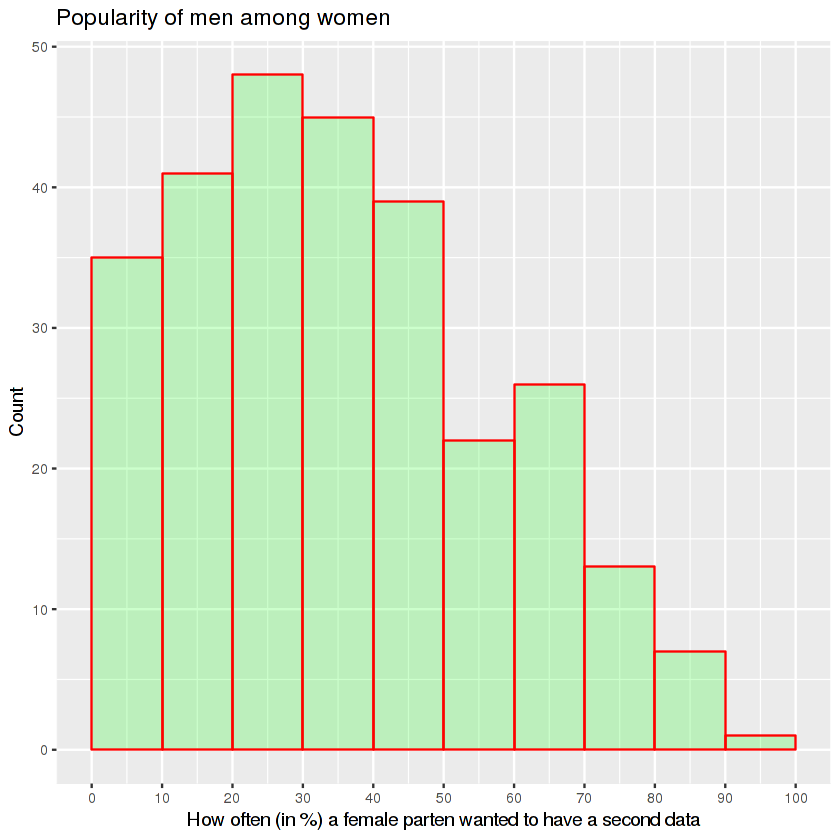

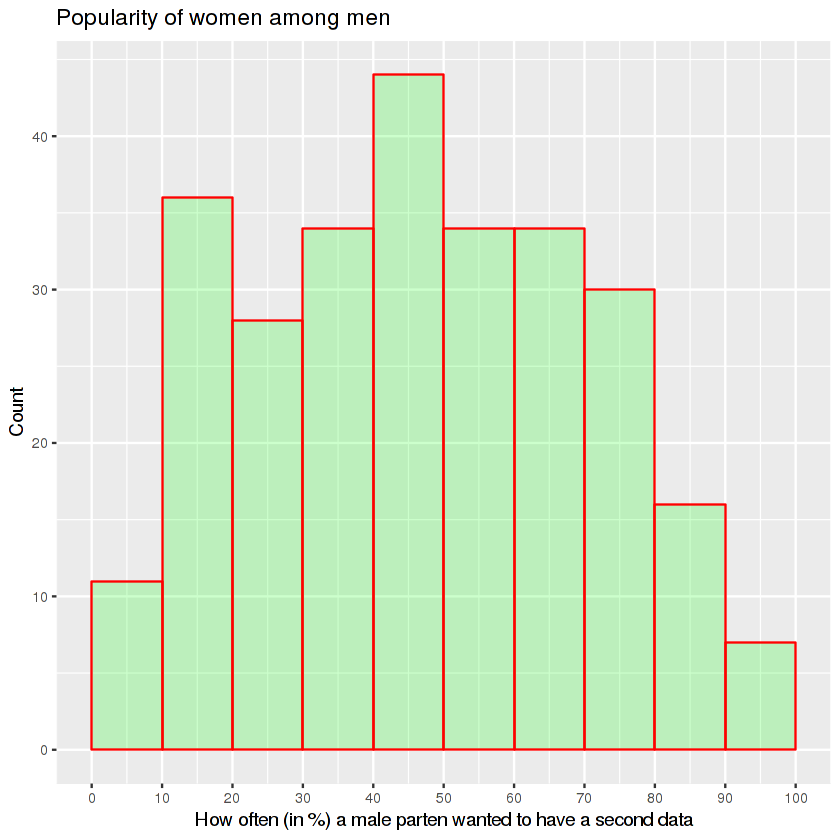

In [2]:
################
#Difference of popularity between men and women

#Men
datalabel = Man
datahist = datalabel$PoPRel
maxhist = 100
minhist = 0

ggplot(data = datalabel, aes(datahist), size = 0.2)+
  geom_histogram(breaks = seq (minhist, maxhist, by = 10),
    col = "red",
    fill = "green",
    alpha = .2)+
  labs(title="Popularity of men among women")+
  labs(x = "How often (in %) a female parten wanted to have a second data", y = "Count")+
  scale_x_continuous(limits = c(minhist, maxhist), breaks = seq(minhist, maxhist, 10))

#Women
datalabel = Woman
datahist = datalabel$PoPRel
maxhist = 100
minhist = 0

ggplot(data = datalabel, aes(datahist))+
  geom_histogram(breaks = seq (minhist, maxhist, by = 10),
                 col = "red",
                 fill = "green",
                 alpha = .2)+
  labs(title="Popularity of women among men")+
  labs(x = "How often (in %) a male parten wanted to have a second data", y = "Count")+
  scale_x_continuous(limits = c(minhist, maxhist), breaks = seq(minhist, maxhist, 10))

Popularity of women among men is similar to normal distribution: there are few women which are very popular and unpopular. Most of them have medium popularity. 

On the other hand there are very few popular man, many unpopular and most of them have low popularity. 

3. Women
---------
I divided women on 3 subsets because of their popularity. 

In [3]:
#Dividing women on subsets because of their popularity
TopWoman = Woman[-c(seq(28,274,1)),]
BottomWoman = Woman[-c(seq(1,247,1)),]
CommonWoman = Woman[-c(seq(248,274,1)),]
CommonWoman = CommonWoman[-c(seq(1,27,1)),]

Top 10% women with the highest popularity (between 80% and 100%) are in TopWoman subset. 

Bottom 10% women with the lowest popularity (between 0% and 17%) are in BottomWoman subset. 

The rest of women with medium popularity (between 17% and 80%) are in CommonWoman subset. 


**Race**

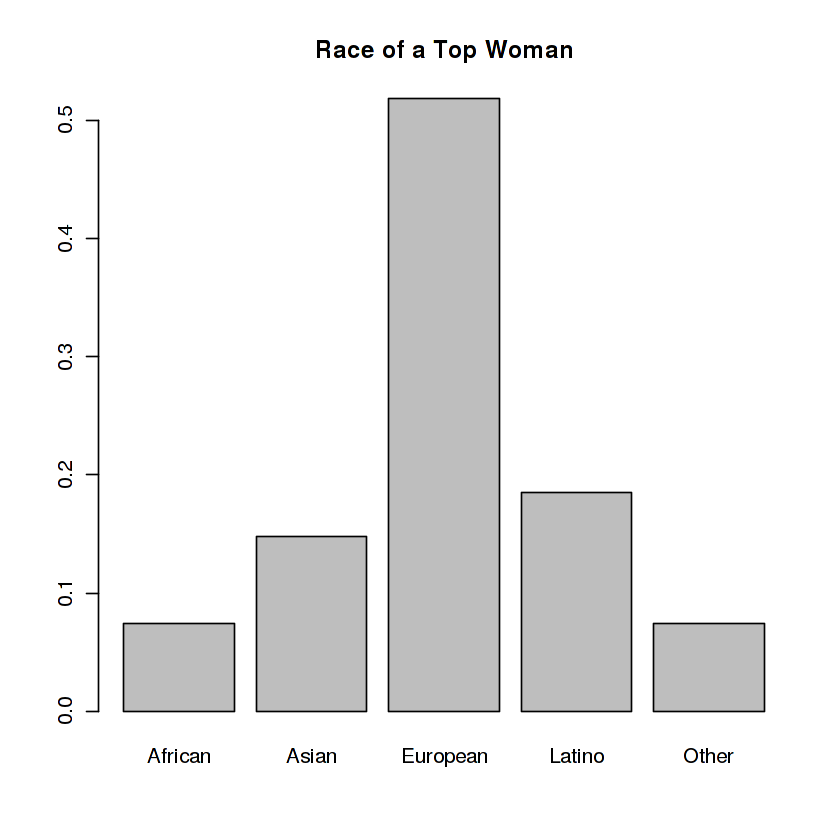

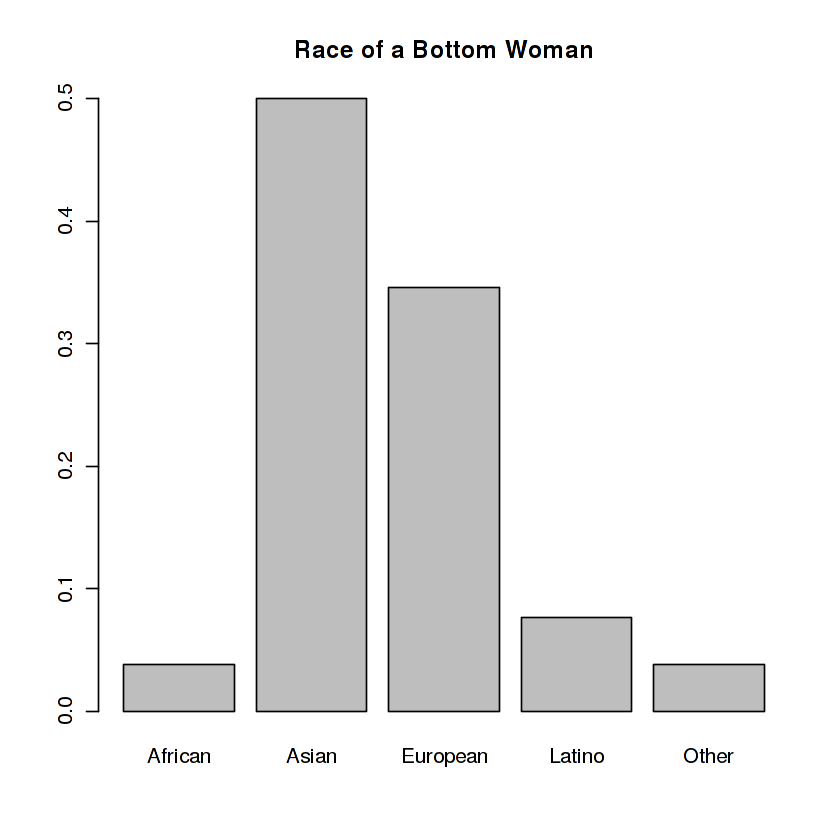

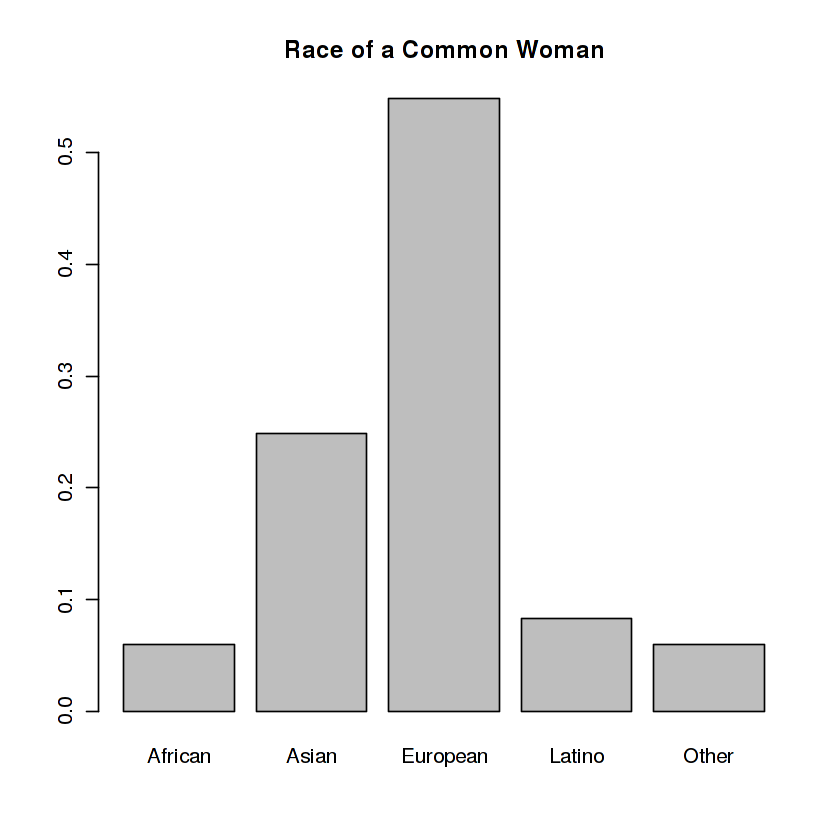

In [4]:
###############################
#Race overview

barplot(prop.table(table(TopWoman$race)), main="Race of a Top Woman")
barplot(prop.table(table(BottomWoman$race)), main="Race of a Bottom Woman")
barplot(prop.table(table(CommonWoman$race)), main="Race of a Common Woman")

The biggest difference between subsets is in the proportion of Asian women. 

In TopWoman Asian is only third among the most numerous races. 

In BottomWoman Asian is the most numerous race (in TopWoman and Common Woman the most numerous race is European). 

In CommonWoman Asian is second among the most numerous races. 

**Field of study**

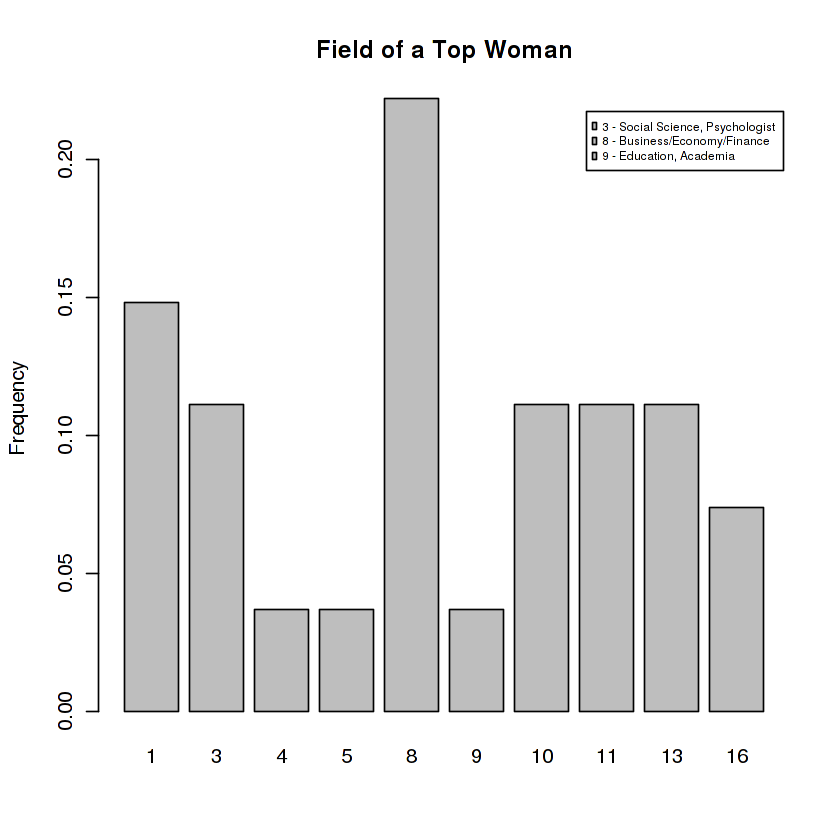

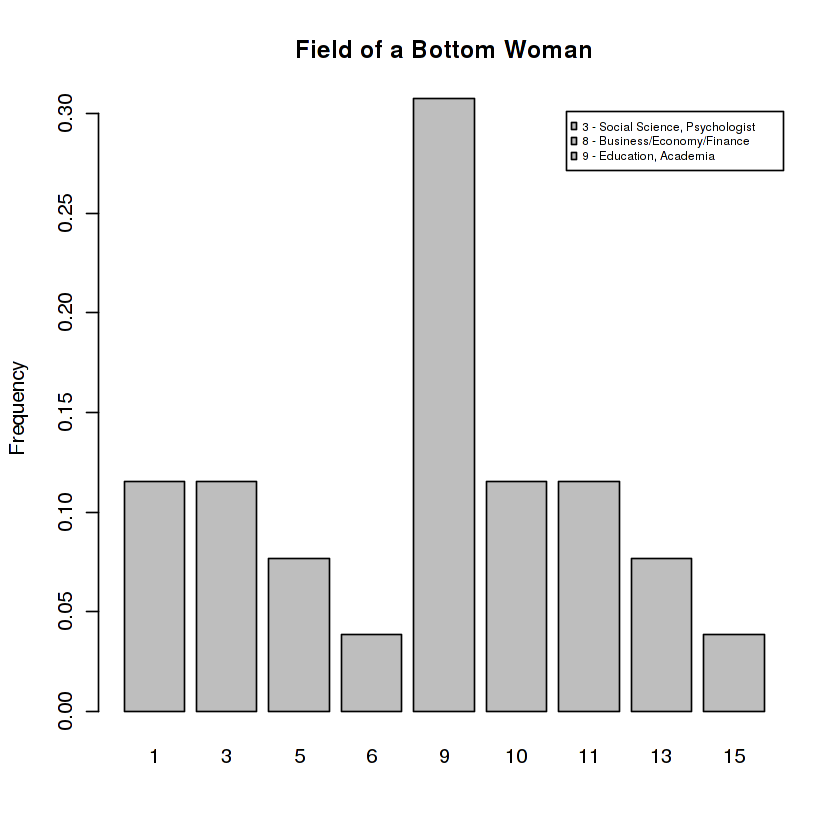

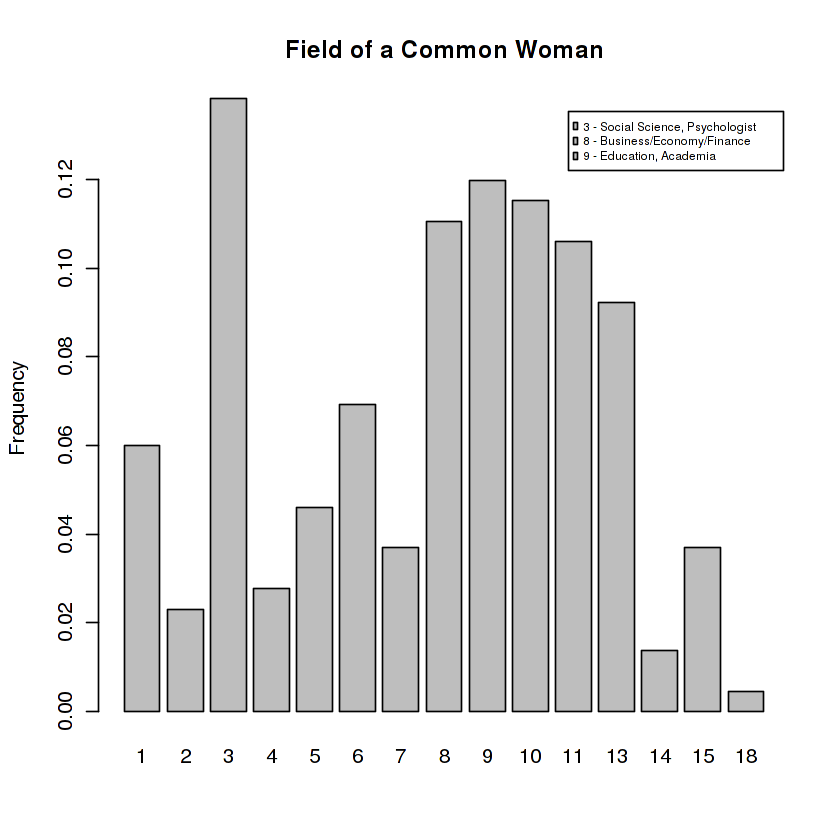

In [5]:
###############################
#Field overview

barplot(prop.table(table(TopWoman$field_cd)), main="Field of a Top Woman", 
        legend.text = c("3 - Social Science, Psychologist", 
        "8 - Business/Economy/Finance", "9 - Education, Academia "
        ), args.legend = list(text.width = 3.3, xjust = 1, cex = 0.58), ylab = "Frequency")
barplot(prop.table(table(BottomWoman$field_cd)), main="Field of a Bottom Woman", 
        legend.text = c("3 - Social Science, Psychologist", 
        "8 - Business/Economy/Finance", "9 - Education, Academia "
        ), args.legend = list(text.width = 3.3, xjust = 1, cex = 0.58), ylab = "Frequency")
barplot(prop.table(table(CommonWoman$field_cd)), main="Field of a Common Woman", , 
        legend.text = c("3 - Social Science, Psychologist", 
        "8 - Business/Economy/Finance", "9 - Education, Academia "
        ), args.legend = list(text.width = 5.5, xjust = 1, cex = 0.58), ylab = "Frequency")

TopWomen usually study fields connected with Business and Finance (none of women from BottomWoman subset  studied these fields). 

BottomWomen usually study fields connected with Education. 

CommonWomen usually study fields connected with Social Sciences (but Education  and Business are also popular).

**Intended career**

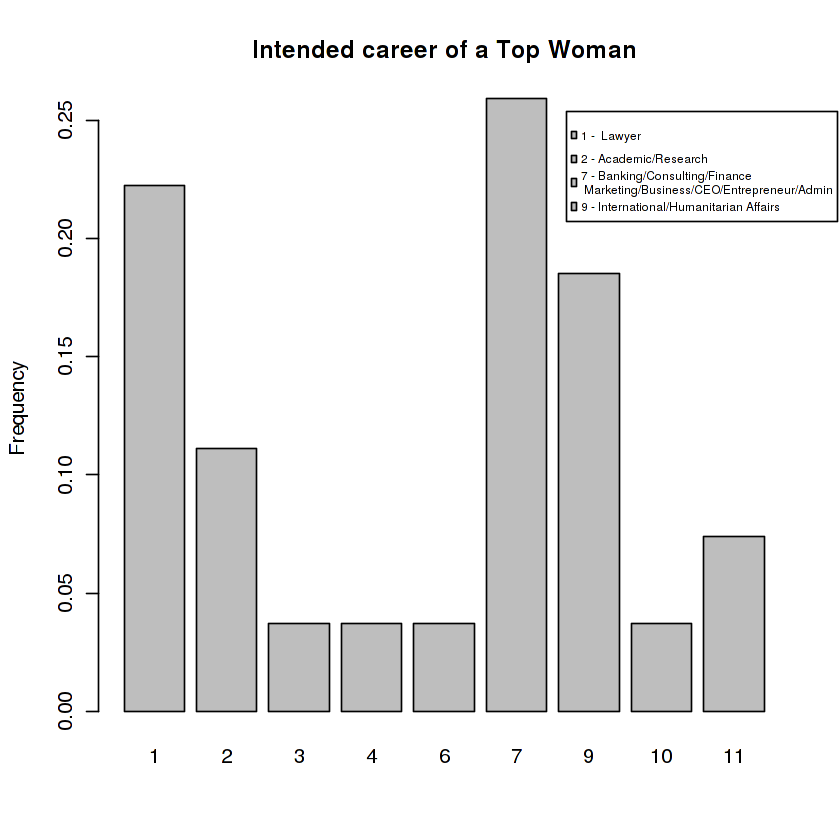

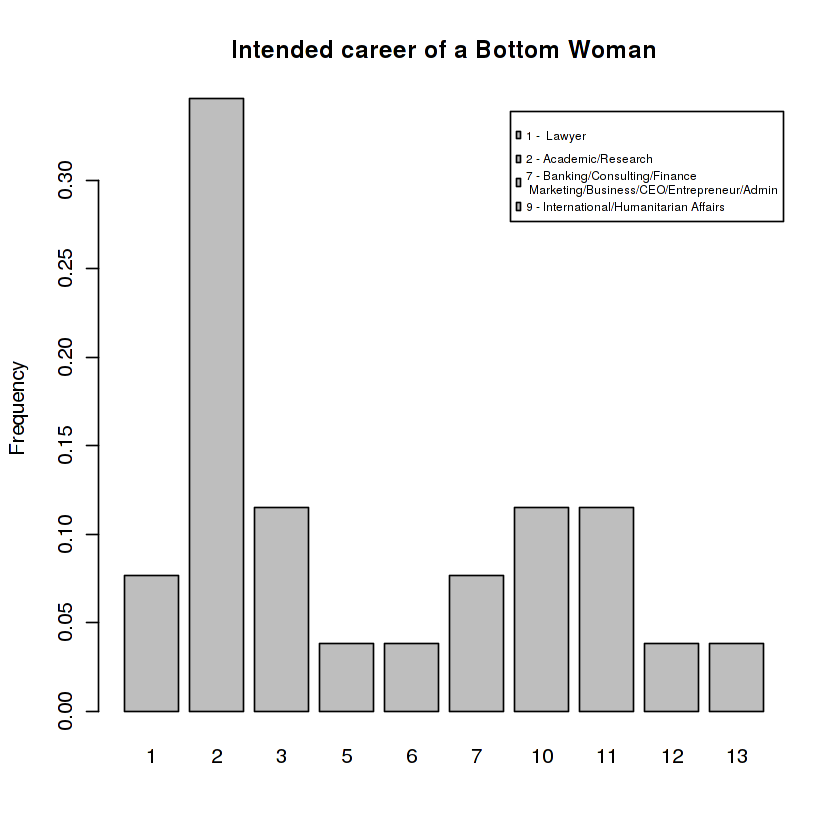

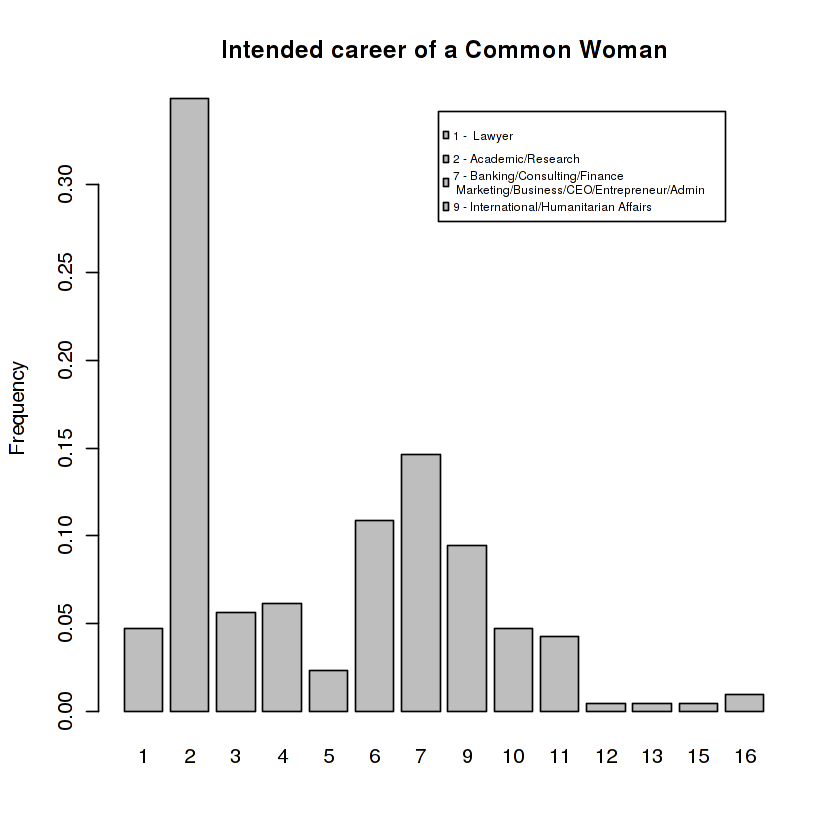

In [6]:
###############################
#Career overview

barplot(prop.table(table(TopWoman$career_c)), main="Intended career of a Top Woman", 
        legend.text = c("1 -  Lawyer" , "2 - Academic/Research",
        "7 - Banking/Consulting/Finance \n Marketing/Business/CEO/Entrepreneur/Admin ", 
        "9 - International/Humanitarian Affairs "
        ), args.legend = list(text.width = 4.2, xjust = 0.8, cex = 0.58), ylab = "Frequency")
barplot(prop.table(table(BottomWoman$career_c)), main="Intended career of a Bottom Woman", 
        legend.text = c("1 -  Lawyer" , "2 - Academic/Research",
        "7 - Banking/Consulting/Finance \n Marketing/Business/CEO/Entrepreneur/Admin ", 
        "9 - International/Humanitarian Affairs "
        ), args.legend = list(text.width = 4.7, xjust = 1, cex = 0.58), ylab = "Frequency")
barplot(prop.table(table(CommonWoman$career_c)), main="Intended career of a Common Woman", , 
        legend.text = c("1 -  Lawyer" , "2 - Academic/Research",
        "7 - Banking/Consulting/Finance \n Marketing/Business/CEO/Entrepreneur/Admin ", 
        "9 - International/Humanitarian Affairs "
        ), args.legend = list(text.width = 7, xjust = 1.2, cex = 0.58), ylab = "Frequency")

TopWomen usually want to work in business, law and human affair. Academic is only fourth intended career path.

On the other hand CommonWomen and BottomWomen definitely prefer working in Academic/Research. 

**Goal**

What is a primary goal in participating in a speed dating event? 

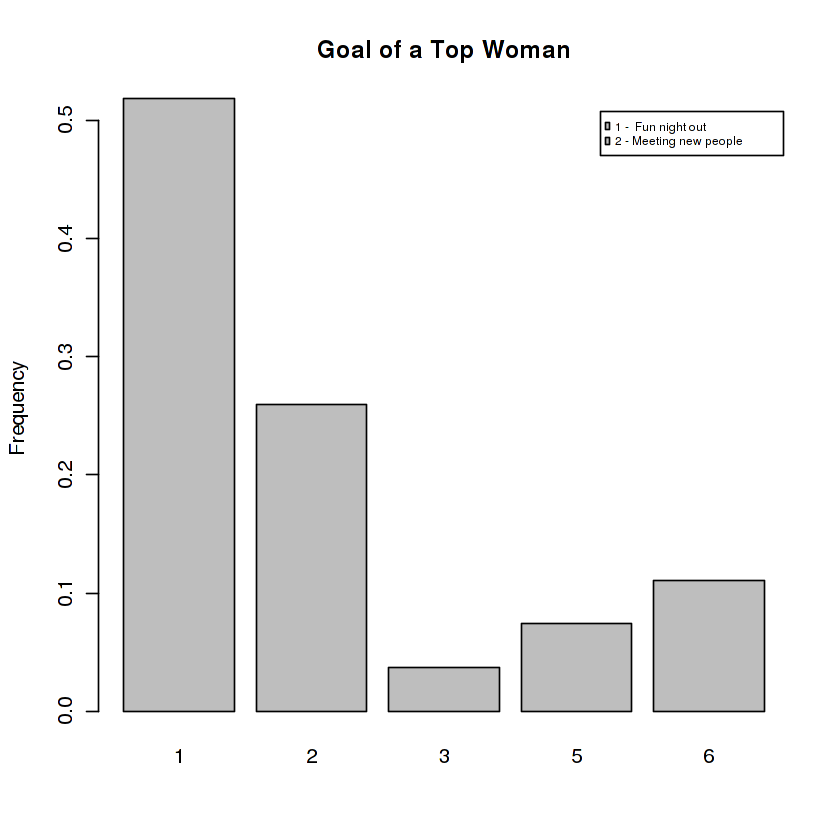

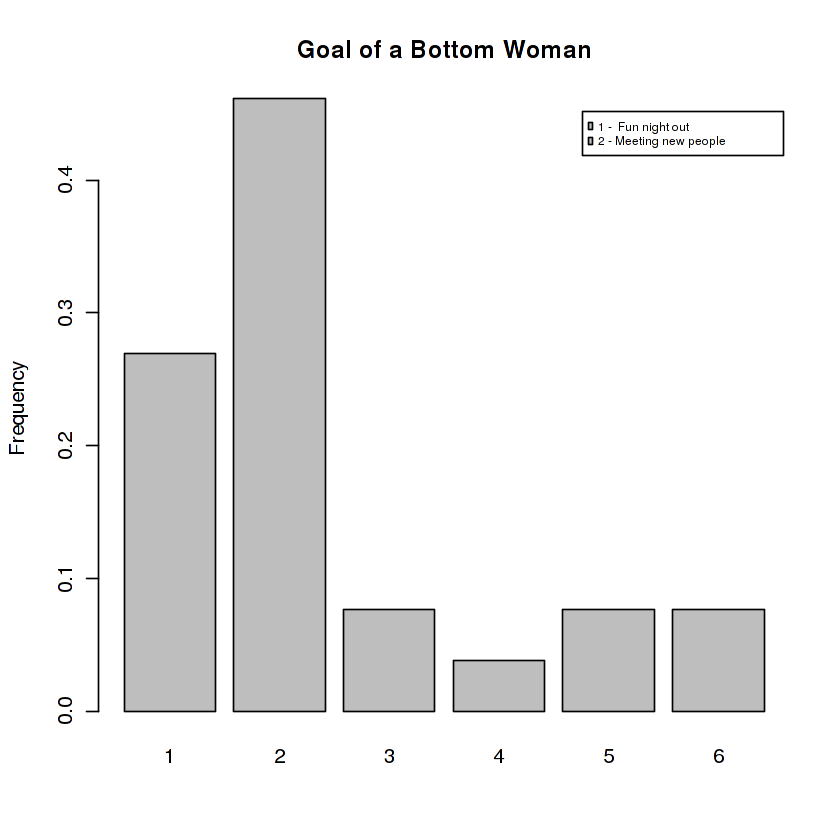

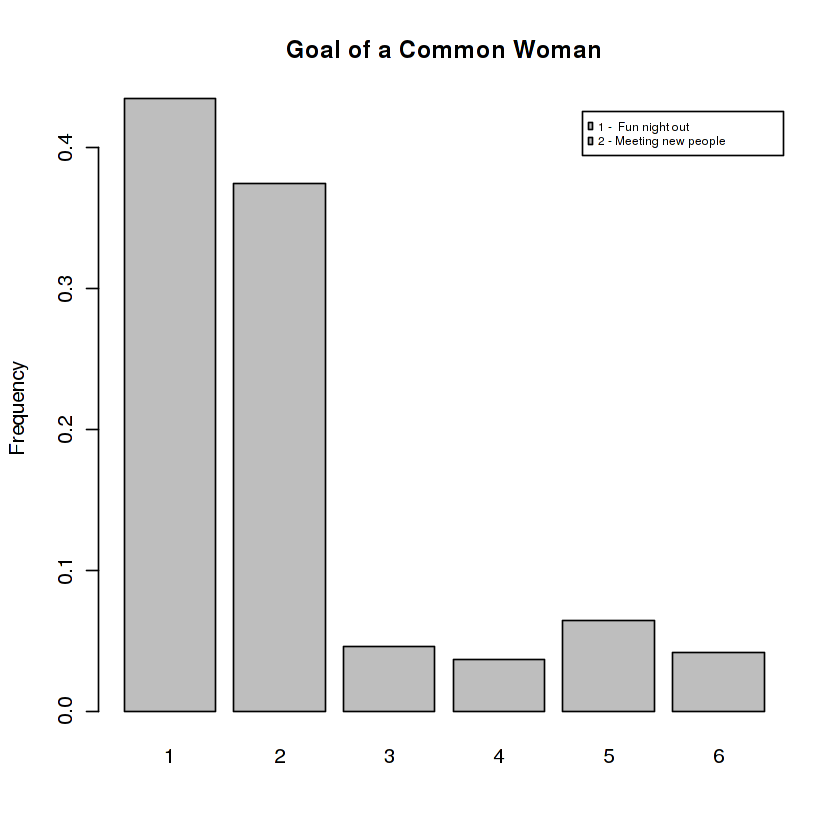

In [7]:
###############################
#Goals overview

barplot(prop.table(table(TopWoman$goal)), main="Goal of a Top Woman", 
        legend.text = c("1 -  Fun night out" , "2 - Meeting new people"
        ), args.legend = list(text.width = 1.5, xjust = 1, cex = 0.58), ylab = "Frequency")
barplot(prop.table(table(BottomWoman$goal)), main="Goal of a Bottom Woman", 
        legend.text = c("1 -  Fun night out" , "2 - Meeting new people"
        ), args.legend = list(text.width = 2, xjust = 1, cex = 0.58), ylab = "Frequency")
barplot(prop.table(table(CommonWoman$goal)), main="Goal of a Common Woman",  
        legend.text = c("1 -  Fun night out" , "2 - Meeting new people"
        ), args.legend = list(text.width = 2, xjust = 1, cex = 0.58), ylab = "Frequency")

TopWomen are mostly focused on having fun. 

BottomWomen are significantly focused on fun but most of them want to meet new people. 

Common Woman want to have fun and meet new people.

**Going out**

How often do women go out? 

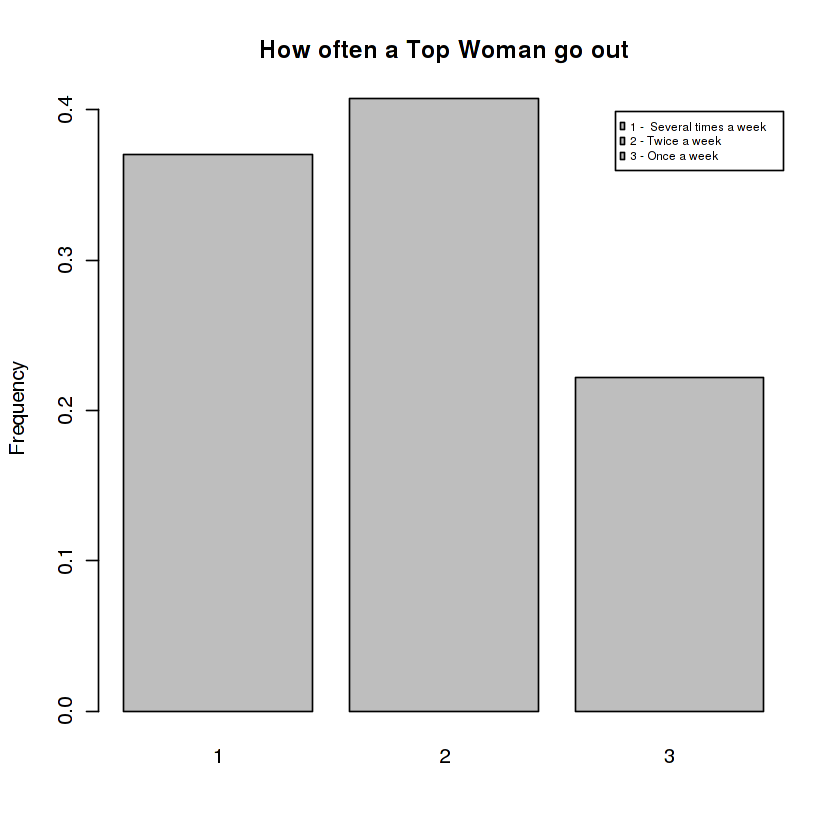

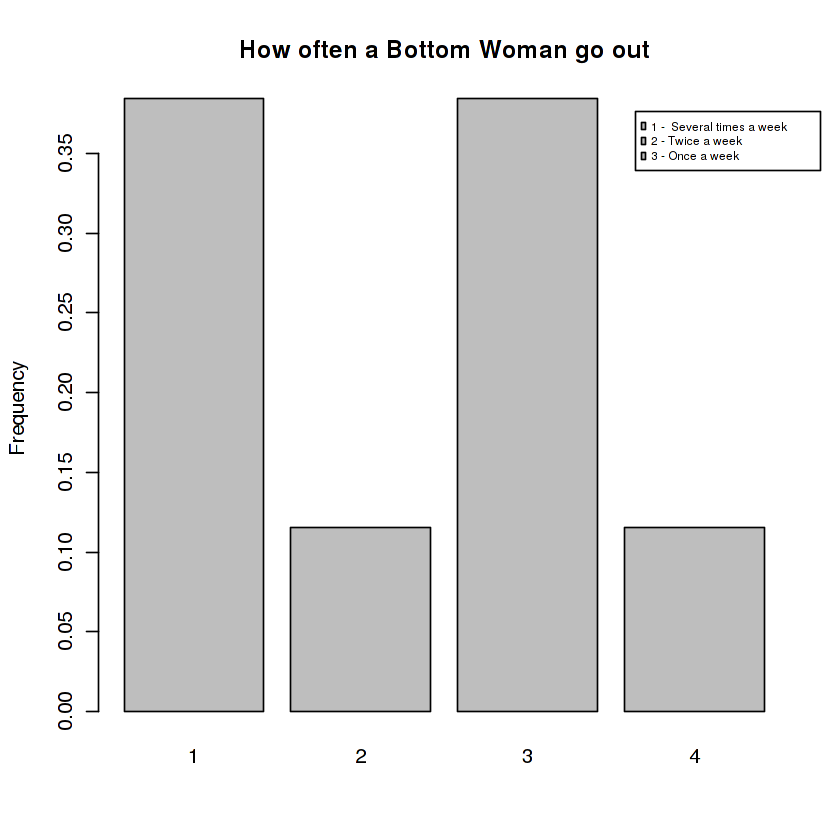

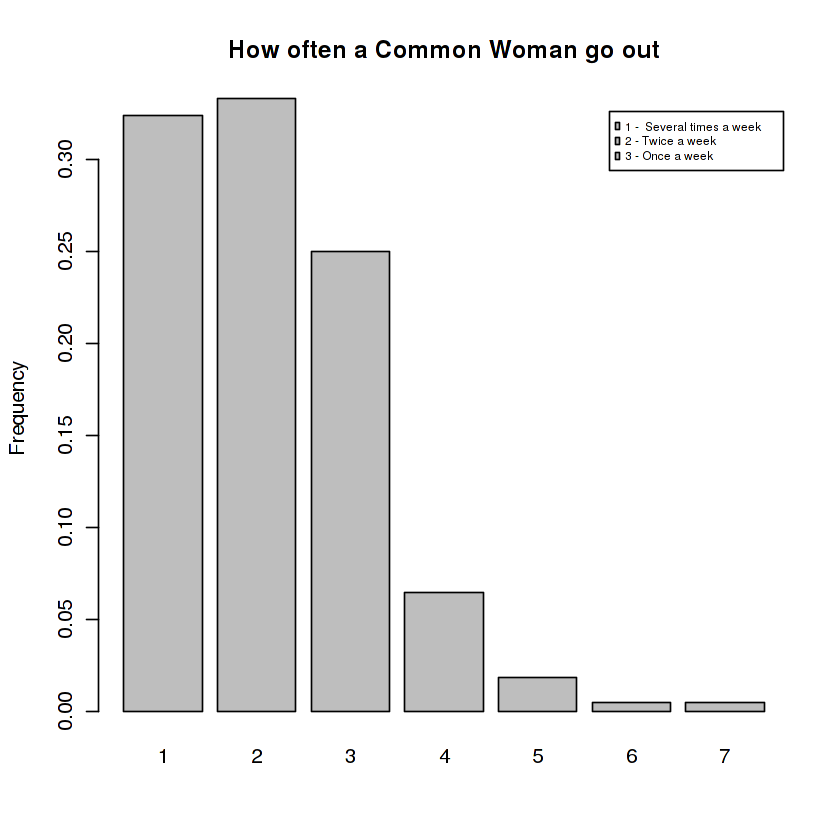

In [8]:
###############################
#Going out overview

barplot(prop.table(table(TopWoman$go_out)), main="How often a Top Woman go out", 
        legend.text = c("1 -  Several times a week" , "2 - Twice a week", "3 - Once a week"
        ), args.legend = list(text.width = 0.8, xjust = 1, cex = 0.58), ylab = "Frequency")
barplot(prop.table(table(BottomWoman$go_out)), main="How often a Bottom Woman go out", 
        legend.text = c("1 -  Several times a week" , "2 - Twice a week", "3 - Once a week"
        ), args.legend = list(text.width = 1.2, xjust = 0.8, cex = 0.58), ylab = "Frequency")
barplot(prop.table(table(CommonWoman$go_out)), main="How often a Common Woman go out",  
        legend.text = c("1 -  Several times a week" , "2 - Twice a week", "3 - Once a week"
        ), args.legend = list(text.width = 2, xjust = 1, cex = 0.58), ylab = "Frequency")

TopWomen more often go out than CommonWomen. CommonWomen more often go out than BottomWomen. It looks that going out is positively correlated with populartiy. 

**Age**

In [9]:
x = matrix(c(quantile(TopWoman$age, na.rm = TRUE)[1], 
    quantile(TopWoman$age, na.rm = TRUE)[2], quantile(TopWoman$age, na.rm = TRUE)[3],
    round(mean(na.omit(TopWoman$age)), digits = 2), 
    quantile(TopWoman$age, na.rm = TRUE)[4], quantile(TopWoman$age, na.rm = TRUE)[5],
    quantile(BottomWoman$age, na.rm = TRUE)[1], 
    quantile(BottomWoman$age, na.rm = TRUE)[2], quantile(BottomWoman$age, na.rm = TRUE)[3],
    round(mean(na.omit(BottomWoman$age)), digits = 2), 
    quantile(BottomWoman$age, na.rm = TRUE)[4], quantile(BottomWoman$age, na.rm = TRUE)[5],
    quantile(CommonWoman$age, na.rm = TRUE)[1], 
    quantile(CommonWoman$age, na.rm = TRUE)[2], quantile(CommonWoman$age, na.rm = TRUE)[3],
    round(mean(na.omit(CommonWoman$age)), digits = 2), 
    quantile(CommonWoman$age, na.rm = TRUE)[4], quantile(CommonWoman$age, na.rm = TRUE)[5]
    ), ncol = 6, byrow = TRUE)

colnames(x) = c("Min", "1st Quantile", "Median", "Mean", "3rd Quantile", "Max")
rownames(x) = c("TopWoman", "BottomWoman", "CommonWoman")

x

,Min,1st Quantile,Median,Mean,3rd Quantile,Max
TopWoman,19,23.00,25,24.67,26.50,29
BottomWoman,21,23.25,24,26.85,28.75,55
CommonWoman,20,23.00,26,26.22,28.00,38


Young women (below 30 years) are in all 3 subsets. 

Medium age women (between 30 and 40 years) are only among BottomWomen and CommonWomen.

Women above 40 years are only among BottomWomen.

**Imprace**

How important is it for a woman (on a scale of 1-10) that a person she dates be of the same racial/ethnic background?

In [10]:
x = matrix(c(quantile(TopWoman$imprace, na.rm = TRUE)[1], 
             quantile(TopWoman$imprace, na.rm = TRUE)[2], quantile(TopWoman$imprace, na.rm = TRUE)[3],
             round(mean(na.omit(TopWoman$sports)), digits = 2), 
             quantile(TopWoman$imprace, na.rm = TRUE)[4], quantile(TopWoman$imprace, na.rm = TRUE)[5],
             quantile(BottomWoman$imprace, na.rm = TRUE)[1], 
             quantile(BottomWoman$imprace, na.rm = TRUE)[2], quantile(BottomWoman$imprace, na.rm = TRUE)[3],
             round(mean(na.omit(BottomWoman$sports)), digits = 2), 
             quantile(BottomWoman$imprace, na.rm = TRUE)[4], quantile(BottomWoman$imprace, na.rm = TRUE)[5],
             quantile(CommonWoman$imprace, na.rm = TRUE)[1], 
             quantile(CommonWoman$imprace, na.rm = TRUE)[2], quantile(CommonWoman$imprace, na.rm = TRUE)[3],
             round(mean(na.omit(CommonWoman$sports)), digits = 2), 
             quantile(CommonWoman$imprace, na.rm = TRUE)[4], quantile(CommonWoman$imprace, na.rm = TRUE)[5]
), ncol = 6, byrow = TRUE)

colnames(x) = c("Min", "1st Quantile", "Median", "Mean", "3rd Quantile", "Max")
rownames(x) = c("TopWoman", "BottomWoman", "CommonWoman")

x

,Min,1st Quantile,Median,Mean,3rd Quantile,Max
TopWoman,1,1,2.0,6.26,4.5,10
BottomWoman,0,1,3.5,5.31,6.0,9
CommonWoman,1,1,3.0,5.70,7.0,10


TopWoman has much lower median and 3rd quartile than BottomWoman and CommonWoman. It seems that women who are less conservative about the race of their partner are more popular among men. 

**Imprelig**

How important is it for a woman (on a scale of 1-10) that a person she dates be of the same religious background?

In [11]:
x = matrix(c(quantile(TopWoman$imprelig, na.rm = TRUE)[1], 
             quantile(TopWoman$imprelig, na.rm = TRUE)[2], quantile(TopWoman$imprelig, na.rm = TRUE)[3],
             round(mean(na.omit(TopWoman$sports)), digits = 2), 
             quantile(TopWoman$imprelig, na.rm = TRUE)[4], quantile(TopWoman$imprelig, na.rm = TRUE)[5],
             quantile(BottomWoman$imprelig, na.rm = TRUE)[1], 
             quantile(BottomWoman$imprelig, na.rm = TRUE)[2], quantile(BottomWoman$imprelig, na.rm = TRUE)[3],
             round(mean(na.omit(BottomWoman$sports)), digits = 2), 
             quantile(BottomWoman$imprelig, na.rm = TRUE)[4], quantile(BottomWoman$imprelig, na.rm = TRUE)[5],
             quantile(CommonWoman$imprelig, na.rm = TRUE)[1], 
             quantile(CommonWoman$imprelig, na.rm = TRUE)[2], quantile(CommonWoman$imprelig, na.rm = TRUE)[3],
             round(mean(na.omit(CommonWoman$sports)), digits = 2), 
             quantile(CommonWoman$imprelig, na.rm = TRUE)[4], quantile(CommonWoman$imprelig, na.rm = TRUE)[5]
), ncol = 6, byrow = TRUE)

colnames(x) = c("Min", "1st Quantile", "Median", "Mean", "3rd Quantile", "Max")
rownames(x) = c("TopWoman", "BottomWoman", "CommonWoman")

x

,Min,1st Quantile,Median,Mean,3rd Quantile,Max
TopWoman,1,1.00,2,6.26,3.5,9
BottomWoman,1,1.00,3,5.31,5.0,10
CommonWoman,1,1.75,4,5.70,6.0,10


TopWoman has much lower median and 3rd quartile than BottomWoman and CommonWoman. It seems that women who are less conservative about the religion of their partner are more popular among men. 

Interests
---------
How interested are women in the following activities, on a scale of 1-10?


**Sports**

In [12]:
x = matrix(c(quantile(TopWoman$sports, na.rm = TRUE)[1], 
             quantile(TopWoman$sports, na.rm = TRUE)[2], quantile(TopWoman$sports, na.rm = TRUE)[3],
             round(mean(na.omit(TopWoman$sports)), digits = 2), 
             quantile(TopWoman$sports, na.rm = TRUE)[4], quantile(TopWoman$sports, na.rm = TRUE)[5],
             quantile(BottomWoman$sports, na.rm = TRUE)[1], 
             quantile(BottomWoman$sports, na.rm = TRUE)[2], quantile(BottomWoman$sports, na.rm = TRUE)[3],
             round(mean(na.omit(BottomWoman$sports)), digits = 2), 
             quantile(BottomWoman$sports, na.rm = TRUE)[4], quantile(BottomWoman$sports, na.rm = TRUE)[5],
             quantile(CommonWoman$sports, na.rm = TRUE)[1], 
             quantile(CommonWoman$sports, na.rm = TRUE)[2], quantile(CommonWoman$sports, na.rm = TRUE)[3],
             round(mean(na.omit(CommonWoman$sports)), digits = 2), 
             quantile(CommonWoman$sports, na.rm = TRUE)[4], quantile(CommonWoman$sports, na.rm = TRUE)[5]
), ncol = 6, byrow = TRUE)

colnames(x) = c("Min", "1st Quantile", "Median", "Mean", "3rd Quantile", "Max")
rownames(x) = c("TopWoman", "BottomWoman", "CommonWoman")

x

,Min,1st Quantile,Median,Mean,3rd Quantile,Max
TopWoman,1,4.00,7,6.26,8,10
BottomWoman,1,3.25,6,5.31,7,10
CommonWoman,1,3.00,6,5.70,8,10


Women which practice sport are more popular (because it improves their appearance, I guess). 

**Exercise**

In [13]:
x = matrix(c(quantile(TopWoman$exercise, na.rm = TRUE)[1], 
             quantile(TopWoman$exercise, na.rm = TRUE)[2], quantile(TopWoman$exercise, na.rm = TRUE)[3],
             round(mean(na.omit(TopWoman$exercise)), digits = 2), 
             quantile(TopWoman$exercise, na.rm = TRUE)[4], quantile(TopWoman$exercise, na.rm = TRUE)[5],
             quantile(BottomWoman$exercise, na.rm = TRUE)[1], 
             quantile(BottomWoman$exercise, na.rm = TRUE)[2], quantile(BottomWoman$exercise, na.rm = TRUE)[3],
             round(mean(na.omit(BottomWoman$exercise)), digits = 2), 
             quantile(BottomWoman$exercise, na.rm = TRUE)[4], quantile(BottomWoman$exercise, na.rm = TRUE)[5],
             quantile(CommonWoman$exercise, na.rm = TRUE)[1], 
             quantile(CommonWoman$exercise, na.rm = TRUE)[2], quantile(CommonWoman$exercise, na.rm = TRUE)[3],
             round(mean(na.omit(CommonWoman$exercise)), digits = 2), 
             quantile(CommonWoman$exercise, na.rm = TRUE)[4], quantile(CommonWoman$exercise, na.rm = TRUE)[5]
), ncol = 6, byrow = TRUE)

colnames(x) = c("Min", "1st Quantile", "Median", "Mean", "3rd Quantile", "Max")
rownames(x) = c("TopWoman", "BottomWoman", "CommonWoman")

x

,Min,1st Quantile,Median,Mean,3rd Quantile,Max
TopWoman,1,5.00,7,6.63,8,10
BottomWoman,1,3.25,5,4.96,6,9
CommonWoman,1,5.00,7,6.51,8,10


TopWomen and CommonWomen has almost the same parameters. But BottomWomen exercise less. Hence women which exercise are more popular (because it improves their appearance, I guess).

**Art**

In [14]:
x = matrix(c(quantile(TopWoman$art, na.rm = TRUE)[1], 
             quantile(TopWoman$art, na.rm = TRUE)[2], quantile(TopWoman$art, na.rm = TRUE)[3],
             round(mean(na.omit(TopWoman$art)), digits = 2), 
             quantile(TopWoman$art, na.rm = TRUE)[4], quantile(TopWoman$art, na.rm = TRUE)[5],
             quantile(BottomWoman$art, na.rm = TRUE)[1], 
             quantile(BottomWoman$art, na.rm = TRUE)[2], quantile(BottomWoman$art, na.rm = TRUE)[3],
             round(mean(na.omit(BottomWoman$art)), digits = 2), 
             quantile(BottomWoman$art, na.rm = TRUE)[4], quantile(BottomWoman$art, na.rm = TRUE)[5],
             quantile(CommonWoman$art, na.rm = TRUE)[1], 
             quantile(CommonWoman$art, na.rm = TRUE)[2], quantile(CommonWoman$art, na.rm = TRUE)[3],
             round(mean(na.omit(CommonWoman$art)), digits = 2), 
             quantile(CommonWoman$art, na.rm = TRUE)[4], quantile(CommonWoman$art, na.rm = TRUE)[5]
), ncol = 6, byrow = TRUE)

colnames(x) = c("Min", "1st Quantile", "Median", "Mean", "3rd Quantile", "Max")
rownames(x) = c("TopWoman", "BottomWoman", "CommonWoman")

x

,Min,1st Quantile,Median,Mean,3rd Quantile,Max
TopWoman,3,6,7,6.74,8,10
BottomWoman,3,6,7,6.88,8,10
CommonWoman,1,6,8,7.32,9,10


TopWomen and BottomWomen like art less than CommonWomen. Women with inordinate popularity like art less than an average woman. 

**TV**

In [15]:
x = matrix(c(quantile(TopWoman$tv, na.rm = TRUE)[1], 
             quantile(TopWoman$tv, na.rm = TRUE)[2], quantile(TopWoman$tv, na.rm = TRUE)[3],
             round(mean(na.omit(TopWoman$tv)), digits = 2), 
             quantile(TopWoman$tv, na.rm = TRUE)[4], quantile(TopWoman$tv, na.rm = TRUE)[5],
             quantile(BottomWoman$tv, na.rm = TRUE)[1], 
             quantile(BottomWoman$tv, na.rm = TRUE)[2], quantile(BottomWoman$tv, na.rm = TRUE)[3],
             round(mean(na.omit(BottomWoman$tv)), digits = 2), 
             quantile(BottomWoman$tv, na.rm = TRUE)[4], quantile(BottomWoman$tv, na.rm = TRUE)[5],
             quantile(CommonWoman$tv, na.rm = TRUE)[1], 
             quantile(CommonWoman$tv, na.rm = TRUE)[2], quantile(CommonWoman$tv, na.rm = TRUE)[3],
             round(mean(na.omit(CommonWoman$tv)), digits = 2), 
             quantile(CommonWoman$tv, na.rm = TRUE)[4], quantile(CommonWoman$tv, na.rm = TRUE)[5]
), ncol = 6, byrow = TRUE)

colnames(x) = c("Min", "1st Quantile", "Median", "Mean", "3rd Quantile", "Max")
rownames(x) = c("TopWoman", "BottomWoman", "CommonWoman")

x

,Min,1st Quantile,Median,Mean,3rd Quantile,Max
TopWoman,1,3.00,5.0,4.89,7.00,10
BottomWoman,1,4.25,5.5,5.85,7.75,9
CommonWoman,1,4.00,6.0,5.82,8.00,10


TopWomen like watching tv less than BottomWomen and CommonWomen. Popular women spend less time on watching tv than other women (probably because they have more occasions to hang out).

**Concerts**

In [16]:
x = matrix(c(quantile(TopWoman$concerts, na.rm = TRUE)[1], 
             quantile(TopWoman$concerts, na.rm = TRUE)[2], quantile(TopWoman$concerts, na.rm = TRUE)[3],
             round(mean(na.omit(TopWoman$concerts)), digits = 2), 
             quantile(TopWoman$concerts, na.rm = TRUE)[4], quantile(TopWoman$concerts, na.rm = TRUE)[5],
             quantile(BottomWoman$concerts, na.rm = TRUE)[1], 
             quantile(BottomWoman$concerts, na.rm = TRUE)[2], quantile(BottomWoman$concerts, na.rm = TRUE)[3],
             round(mean(na.omit(BottomWoman$concerts)), digits = 2), 
             quantile(BottomWoman$concerts, na.rm = TRUE)[4], quantile(BottomWoman$concerts, na.rm = TRUE)[5],
             quantile(CommonWoman$concerts, na.rm = TRUE)[1], 
             quantile(CommonWoman$concerts, na.rm = TRUE)[2], quantile(CommonWoman$concerts, na.rm = TRUE)[3],
             round(mean(na.omit(CommonWoman$concerts)), digits = 2), 
             quantile(CommonWoman$concerts, na.rm = TRUE)[4], quantile(CommonWoman$concerts, na.rm = TRUE)[5]
), ncol = 6, byrow = TRUE)

colnames(x) = c("Min", "1st Quantile", "Median", "Mean", "3rd Quantile", "Max")
rownames(x) = c("TopWoman", "BottomWoman", "CommonWoman")

x

,Min,1st Quantile,Median,Mean,3rd Quantile,Max
TopWoman,3,5.5,6,6.70,8.50,10
BottomWoman,1,6.0,8,7.00,8.75,10
CommonWoman,1,6.0,7,7.23,9.00,10


 Popular women like concerts less than other women. 

**Yoga**

In [17]:
x = matrix(c(quantile(TopWoman$yoga, na.rm = TRUE)[1], 
             quantile(TopWoman$yoga, na.rm = TRUE)[2], quantile(TopWoman$yoga, na.rm = TRUE)[3],
             round(mean(na.omit(TopWoman$yoga)), digits = 2), 
             quantile(TopWoman$yoga, na.rm = TRUE)[4], quantile(TopWoman$yoga, na.rm = TRUE)[5],
             quantile(BottomWoman$yoga, na.rm = TRUE)[1], 
             quantile(BottomWoman$yoga, na.rm = TRUE)[2], quantile(BottomWoman$yoga, na.rm = TRUE)[3],
             round(mean(na.omit(BottomWoman$yoga)), digits = 2), 
             quantile(BottomWoman$yoga, na.rm = TRUE)[4], quantile(BottomWoman$yoga, na.rm = TRUE)[5],
             quantile(CommonWoman$yoga, na.rm = TRUE)[1], 
             quantile(CommonWoman$yoga, na.rm = TRUE)[2], quantile(CommonWoman$yoga, na.rm = TRUE)[3],
             round(mean(na.omit(CommonWoman$yoga)), digits = 2), 
             quantile(CommonWoman$yoga, na.rm = TRUE)[4], quantile(CommonWoman$yoga, na.rm = TRUE)[5]
), ncol = 6, byrow = TRUE)

colnames(x) = c("Min", "1st Quantile", "Median", "Mean", "3rd Quantile", "Max")
rownames(x) = c("TopWoman", "BottomWoman", "CommonWoman")

x

,Min,1st Quantile,Median,Mean,3rd Quantile,Max
TopWoman,1,4,6.0,5.37,7.00,10
BottomWoman,1,2,4.5,4.58,6.75,10
CommonWoman,1,3,5.0,5.10,7.00,10


TopWomen like yoga more than CommonWomen who like it more than BottomWomen. It looks that liking yoga is positively correlated with popularity. 

**Does a woman feel special?**

I created a new variable which measures a difference between what a woman looks for in the opposite sex (for six characteristics) and what in her opinion search other women. I think that it measures how much a woman feels special (different from other women).  

In [18]:
#I remove data from waves 6-9 because there were different rules of scoring
TopWoman = subset(TopWoman, wave > 9 | wave <6)
BottomWoman = subset(BottomWoman, wave > 9 | wave <6)
CommonWoman = subset(CommonWoman, wave > 9 | wave <6)

#Creating a new variables which measures how a woman feels special
TopWoman$SpecialAtr = abs(TopWoman$attr1_1-TopWoman$attr4_1)
TopWoman$SpecialSinc = abs(TopWoman$sinc1_1-TopWoman$sinc4_1)
TopWoman$SpecialIntel = abs(TopWoman$intel1_1-TopWoman$intel4_1)
TopWoman$SpecialAmb = abs(TopWoman$amb1_1-TopWoman$amb4_1)
TopWoman$SpecialFun = abs(TopWoman$fun1_1-TopWoman$fun4_1)
TopWoman$SpecialShar = abs(TopWoman$shar1_1-TopWoman$shar4_1)
#Estimating mean from all six characteristics
TopWoman$SpecialAv = (TopWoman$SpecialAtr+TopWoman$SpecialSinc+TopWoman$SpecialIntel+
        TopWoman$SpecialAmb+TopWoman$SpecialFun+TopWoman$SpecialShar)/6

#The same calculations for BottomWoman
BottomWoman$SpecialAtr = abs(BottomWoman$attr1_1-BottomWoman$attr4_1)
BottomWoman$SpecialSinc = abs(BottomWoman$sinc1_1-BottomWoman$sinc4_1)
BottomWoman$SpecialIntel = abs(BottomWoman$intel1_1-BottomWoman$intel4_1)
BottomWoman$SpecialAmb = abs(BottomWoman$amb1_1-BottomWoman$amb4_1)
BottomWoman$SpecialFun = abs(BottomWoman$fun1_1-BottomWoman$fun4_1)
BottomWoman$SpecialShar = abs(BottomWoman$shar1_1-BottomWoman$shar4_1)
BottomWoman$SpecialAv = (BottomWoman$SpecialAtr+BottomWoman$SpecialSinc+BottomWoman$SpecialIntel+
                           BottomWoman$SpecialAmb+BottomWoman$SpecialFun+BottomWoman$SpecialShar)/6

#The same calculations for CommonWoman
CommonWoman$SpecialAtr = abs(CommonWoman$attr1_1-CommonWoman$attr4_1)
CommonWoman$SpecialSinc = abs(CommonWoman$sinc1_1-CommonWoman$sinc4_1)
CommonWoman$SpecialIntel = abs(CommonWoman$intel1_1-CommonWoman$intel4_1)
CommonWoman$SpecialAmb = abs(CommonWoman$amb1_1-CommonWoman$amb4_1)
CommonWoman$SpecialFun = abs(CommonWoman$fun1_1-CommonWoman$fun4_1)
CommonWoman$SpecialShar = abs(CommonWoman$shar1_1-CommonWoman$shar4_1)
CommonWoman$SpecialAv = (CommonWoman$SpecialAtr+CommonWoman$SpecialSinc+CommonWoman$SpecialIntel+
                           CommonWoman$SpecialAmb+CommonWoman$SpecialFun+CommonWoman$SpecialShar)/6

x = matrix(c(quantile(TopWoman$SpecialAv, na.rm = TRUE)[1], 
             quantile(TopWoman$SpecialAv, na.rm = TRUE)[2], quantile(TopWoman$SpecialAv, na.rm = TRUE)[3],
             round(mean(na.omit(TopWoman$SpecialAv)), digits = 2), 
             quantile(TopWoman$SpecialAv, na.rm = TRUE)[4], quantile(TopWoman$SpecialAv, na.rm = TRUE)[5],
             quantile(BottomWoman$SpecialAv, na.rm = TRUE)[1], 
             quantile(BottomWoman$SpecialAv, na.rm = TRUE)[2], quantile(BottomWoman$SpecialAv, na.rm = TRUE)[3],
             round(mean(na.omit(BottomWoman$SpecialAv)), digits = 2), 
             quantile(BottomWoman$SpecialAv, na.rm = TRUE)[4], quantile(BottomWoman$SpecialAv, na.rm = TRUE)[5],
             quantile(CommonWoman$SpecialAv, na.rm = TRUE)[1], 
             quantile(CommonWoman$SpecialAv, na.rm = TRUE)[2], quantile(CommonWoman$SpecialAv, na.rm = TRUE)[3],
             round(mean(na.omit(CommonWoman$SpecialAv)), digits = 2), 
             quantile(CommonWoman$SpecialAv, na.rm = TRUE)[4], quantile(CommonWoman$SpecialAv, na.rm = TRUE)[5]
), ncol = 6, byrow = TRUE)

colnames(x) = c("Min", "1st Quantile", "Median", "Mean", "3rd Quantile", "Max")
rownames(x) = c("TopWoman", "BottomWoman", "CommonWoman")

x

,Min,1st Quantile,Median,Mean,3rd Quantile,Max
TopWoman,0,6.666667,8.333333,10.00,12.500000,25.00000
BottomWoman,0,3.333333,6.666667,6.80,8.333333,18.33333
CommonWoman,0,5.000000,6.666667,7.51,10.000000,18.33333


TopWomen feel more special than CommonWomen who feel more special than BottomWomen.

Conclusions
===========

Popular women are 

 - below 30ties
 - usually aren't Asian
 - work in business
 - often go out
 - want to have fun on speed dating meetings
 - are less conservative about race and religion of their partner
 - exercise and practice sport
 - have more interesting things to do than watching tv
 - do not like concerts very much
 - like yoga and feel special.

On the other hand unpopular women usually are 

 - Asian can be over 30 and 40
 - work in Academic or Research
 - want to meet new people on speed dating events
 - are less sociable than popular women
 - are more conservative about race and religion of their partner
 - do not enjoy exercising and sport
 - do not mind watching tv
 - like concerts and do not feel special

**4. Men**
---

I divided men on 3 subsets because of their popularity. 

In [19]:
#Dividing men on subsets because of their popularity
TopMan = Man[-c(seq(28,277,1)),]
BottomMan = Man[-c(seq(1,250,1)),]
CommonMan = Man[-c(seq(251,277,1)),]
CommonMan = CommonMan[-c(seq(1,27,1)),]

Top 10% Men with the highest popularity (between 70% and 94%) are in TopMan subset. 

Bottom 10% Men with the lowest popularity (between 0% and 7%) are in BottomMen subset. 

The rest of Men with medium popularity (between 7% and 70%) are in CommonMen subset. 


**Race**

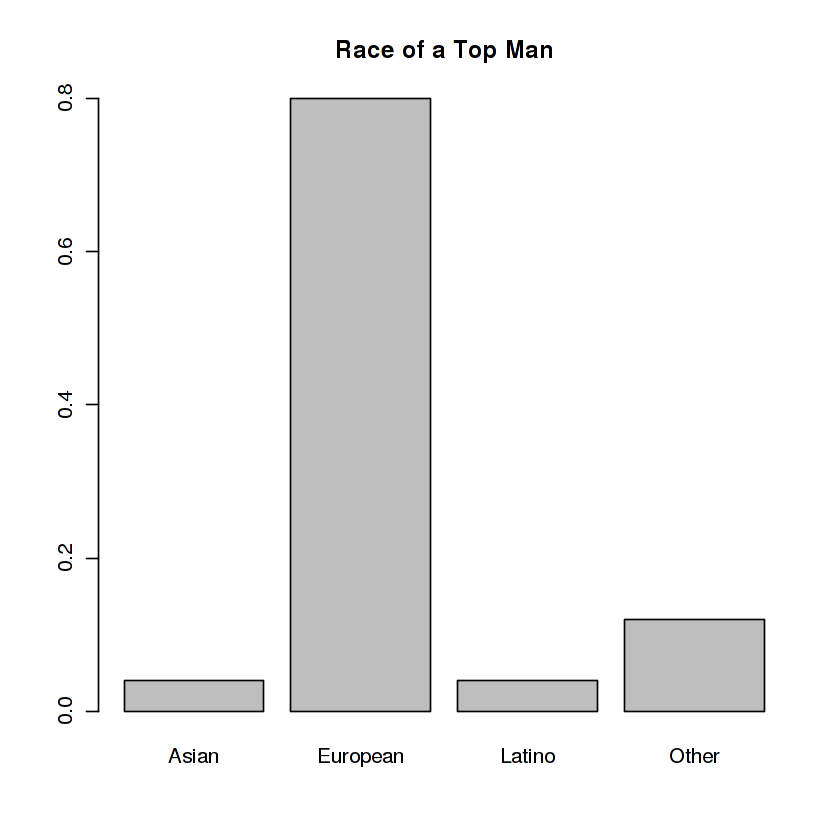

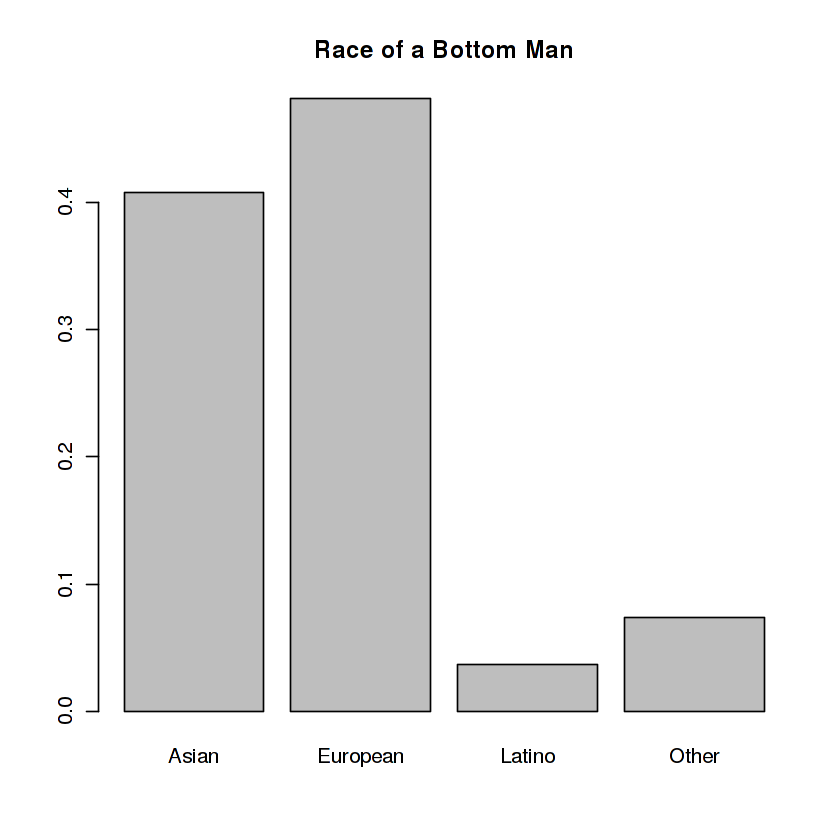

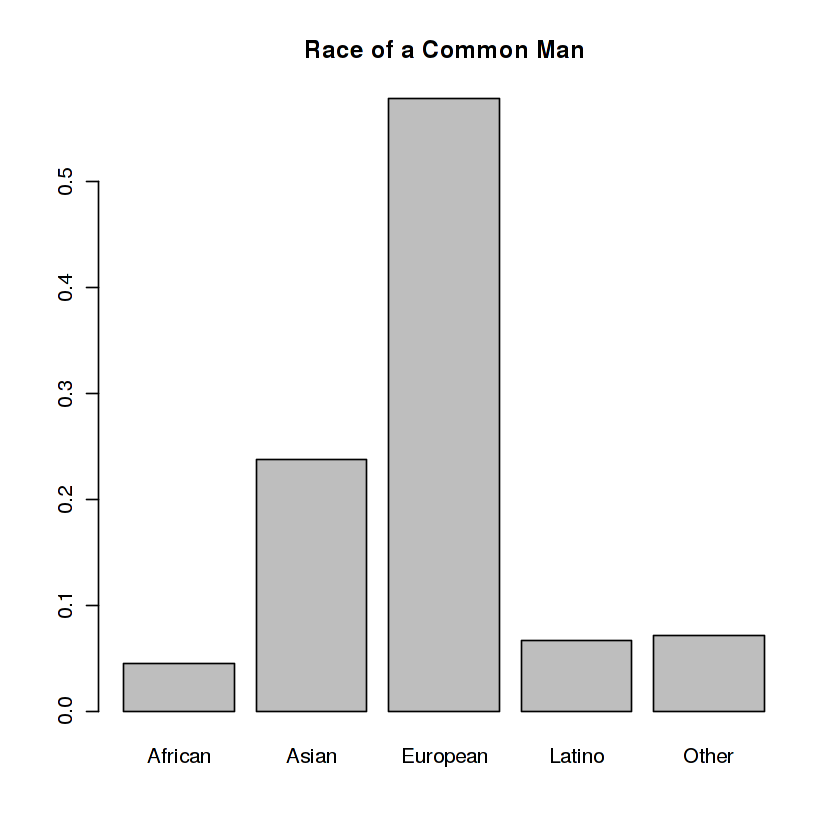

In [20]:
###############################
#Race overview

barplot(prop.table(table(TopMan$race)), main="Race of a Top Man")
barplot(prop.table(table(BottomMan$race)), main="Race of a Bottom Man")
barplot(prop.table(table(CommonMan$race)), main="Race of a Common Man")

Most of TopMen are European.

40% of BottomMen are Asian (20% of CommonMen and almost none of TopMen). 

**Field of study**

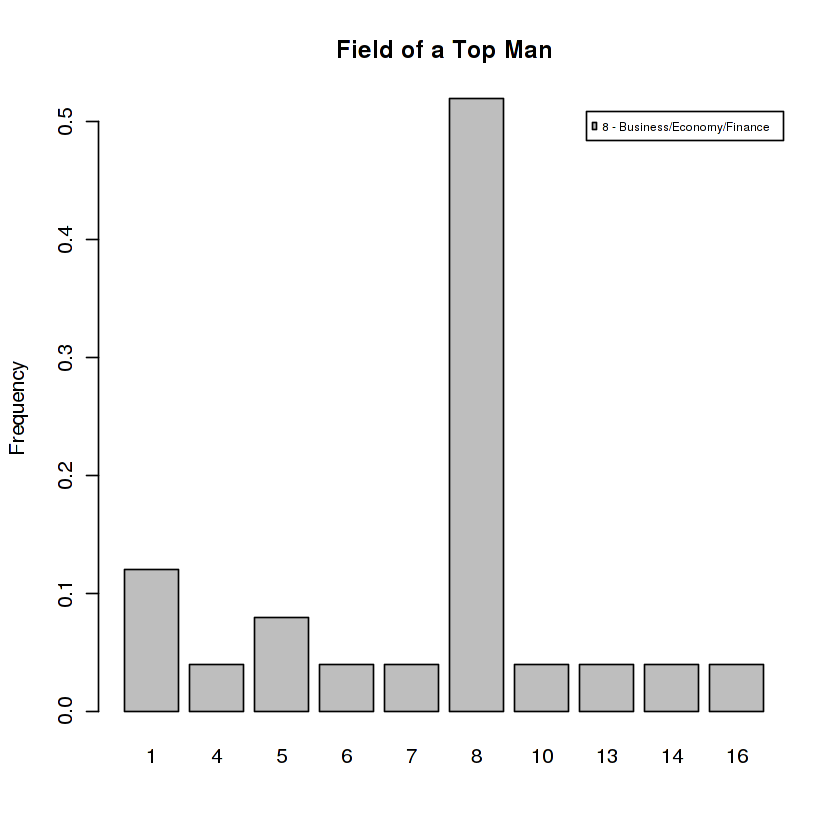

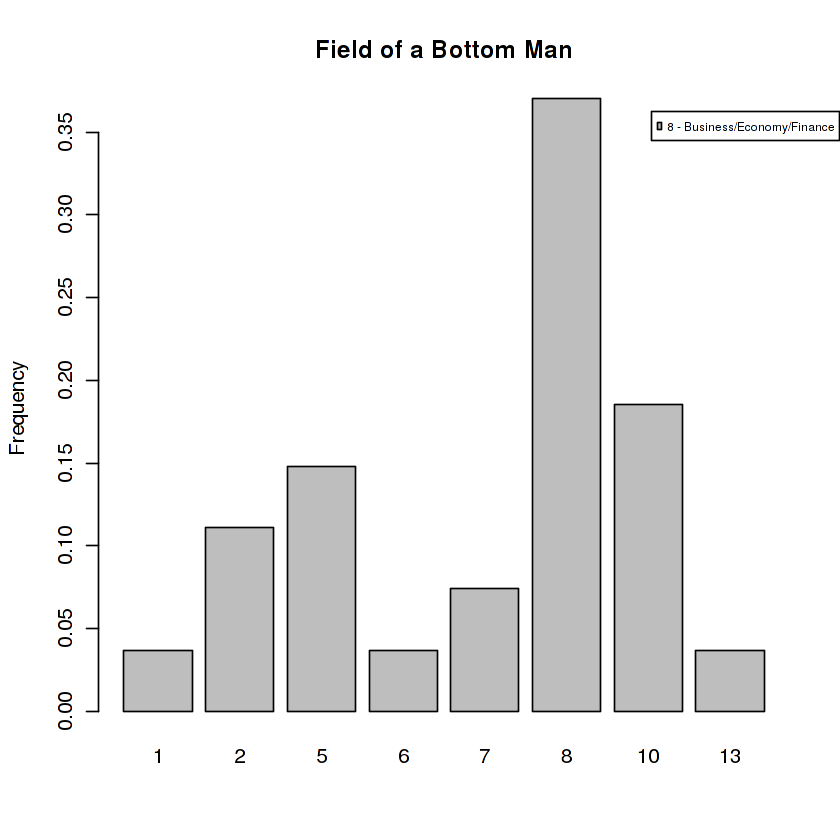

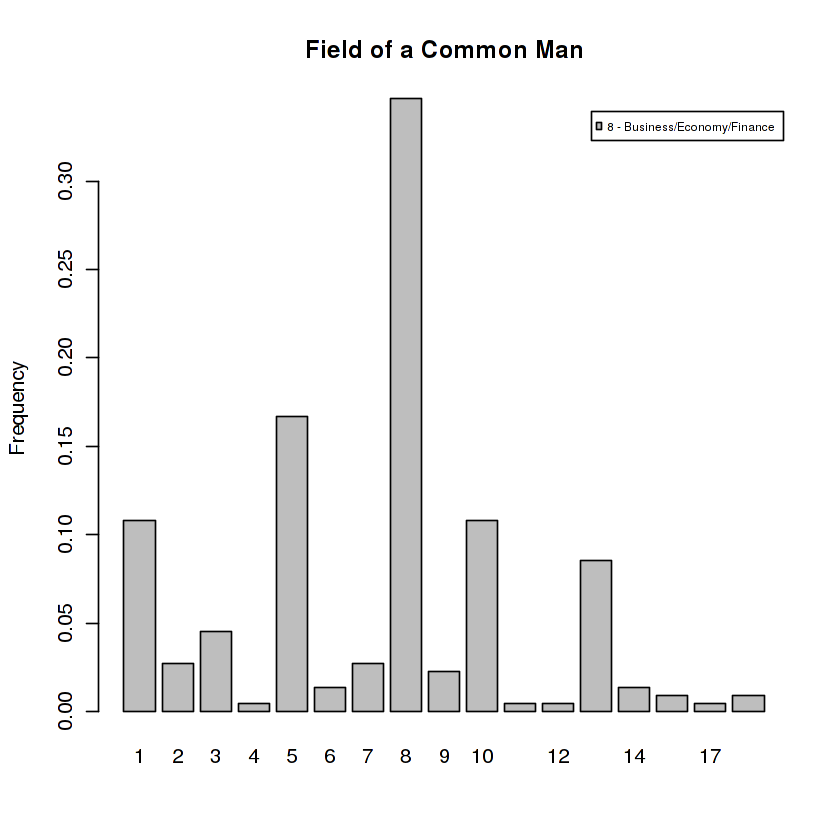

In [21]:
###############################
#Field overview

barplot(prop.table(table(TopMan$field_cd)), main="Field of a Top Man", 
        legend.text = c("8 - Business/Economy/Finance"
        ), args.legend = list(text.width = 3.3, xjust = 1, cex = 0.58), ylab = "Frequency")
barplot(prop.table(table(BottomMan$field_cd)), main="Field of a Bottom Man", 
        legend.text = c("8 - Business/Economy/Finance" 
        ), args.legend = list(text.width = 2.5, xjust = 0.7, cex = 0.58), ylab = "Frequency")
barplot(prop.table(table(CommonMan$field_cd)), main="Field of a Common Man", , 
        legend.text = c("8 - Business/Economy/Finance" 
        ), args.legend = list(text.width = 5.5, xjust = 1, cex = 0.58), ylab = "Frequency")

50% of TopMen study Business/Economy/Finance and only 35% in other groups.  

**Intended career**

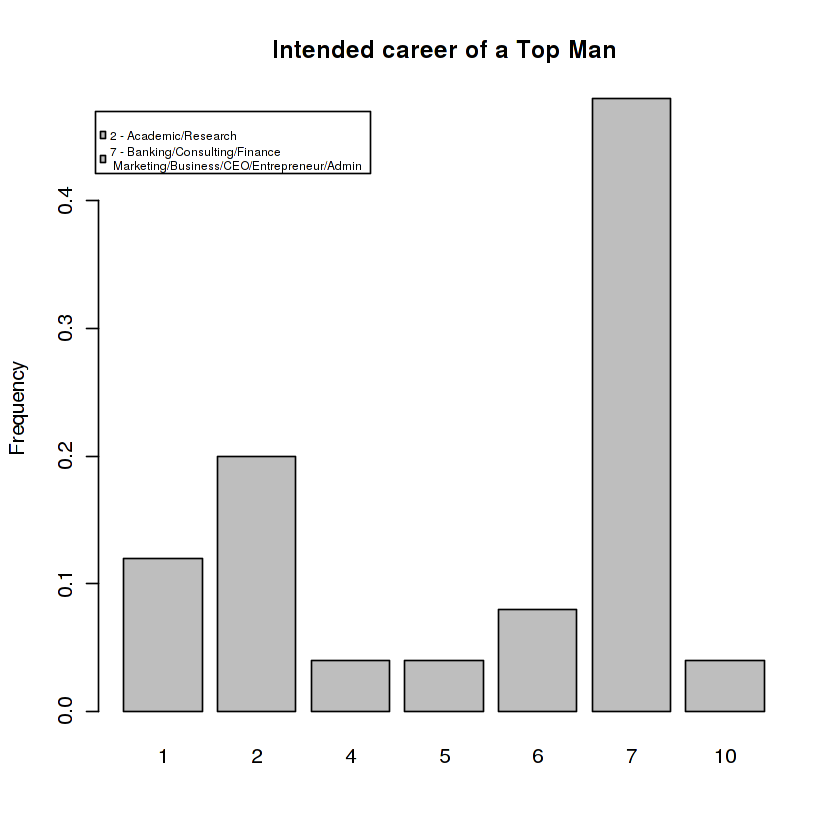

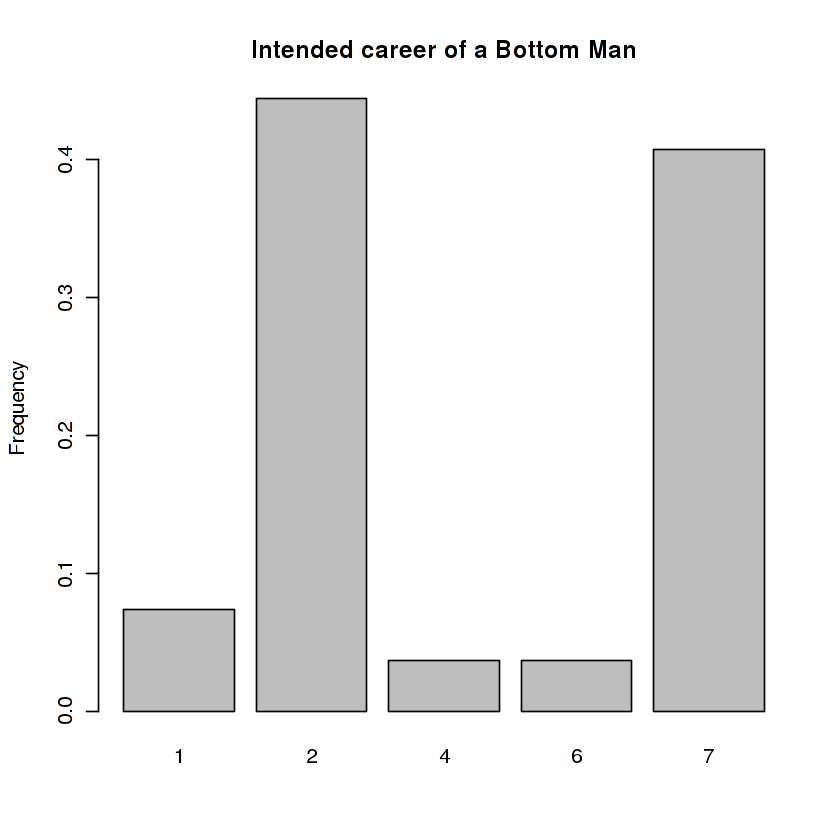

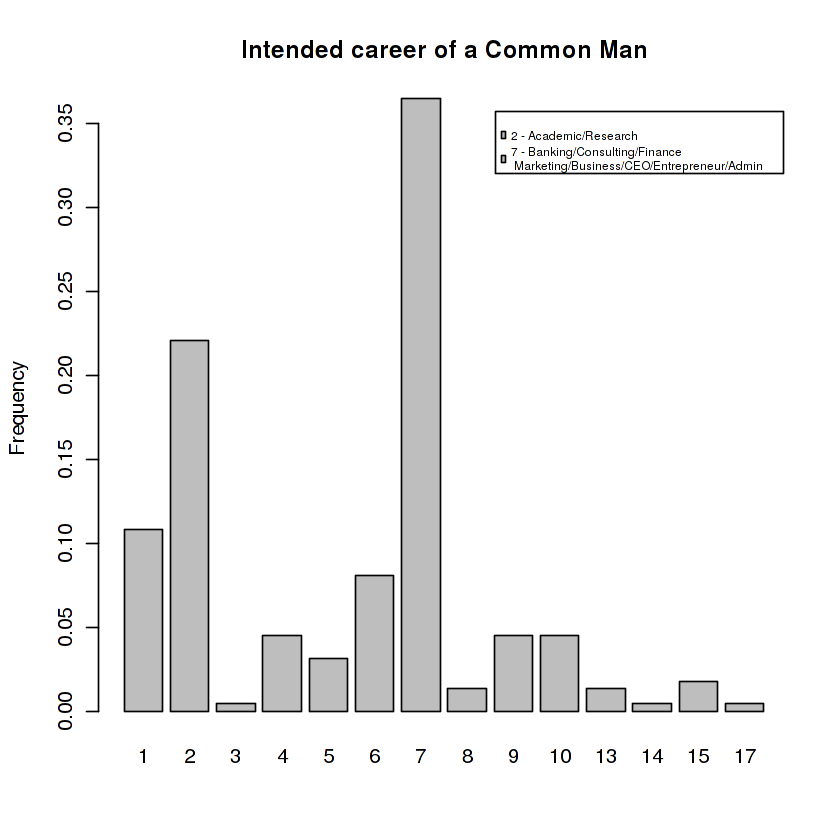

In [22]:
###############################
#Career overview

barplot(prop.table(table(TopMan$career_c)), main="Intended career of a Top Man", 
        legend.text = c("2 - Academic/Research",
        "7 - Banking/Consulting/Finance \n Marketing/Business/CEO/Entrepreneur/Admin "
        ), args.legend = list(text.width = 3.3, xjust = 2.5, cex = 0.58), ylab = "Frequency")
barplot(prop.table(table(BottomMan$career_c)), main="Intended career of a Bottom Man", ylab = "Frequency")
barplot(prop.table(table(CommonMan$career_c)), main="Intended career of a Common Man", , 
        legend.text = c("2 - Academic/Research",
        "7 - Banking/Consulting/Finance \n Marketing/Business/CEO/Entrepreneur/Admin "
        ), args.legend = list(text.width = 7, xjust = 1, cex = 0.58), ylab = "Frequency")

The only significant difference is the higher percentage of men who want to work in Academic/Research among BottomMen (around 40%) than in two other groups (around 20%).

**Goal**

What is a primary goal in participating in a speed dating event? 

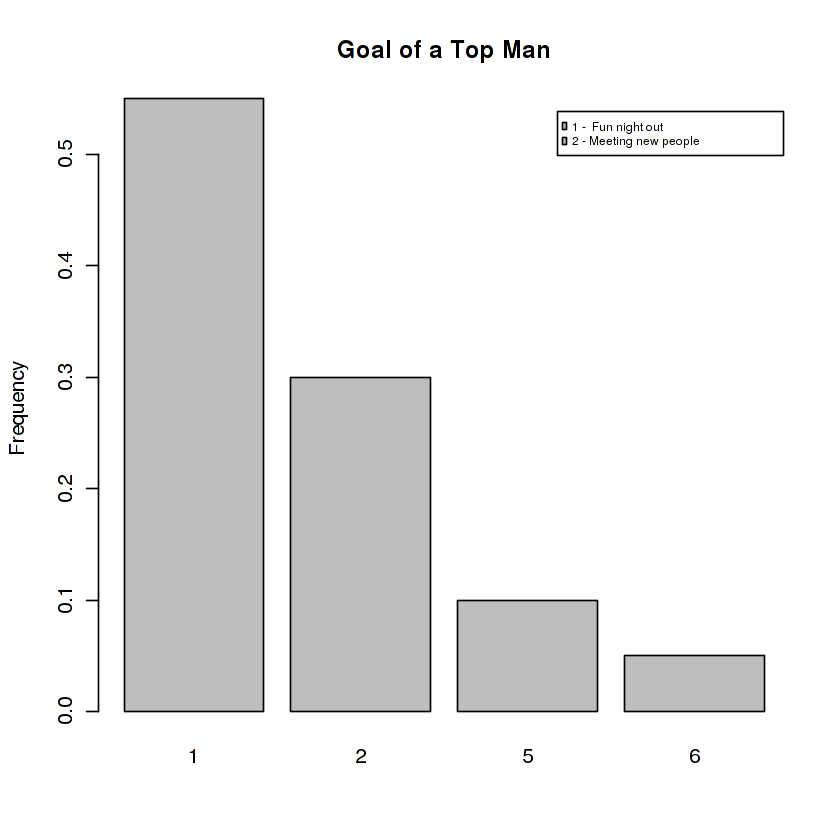

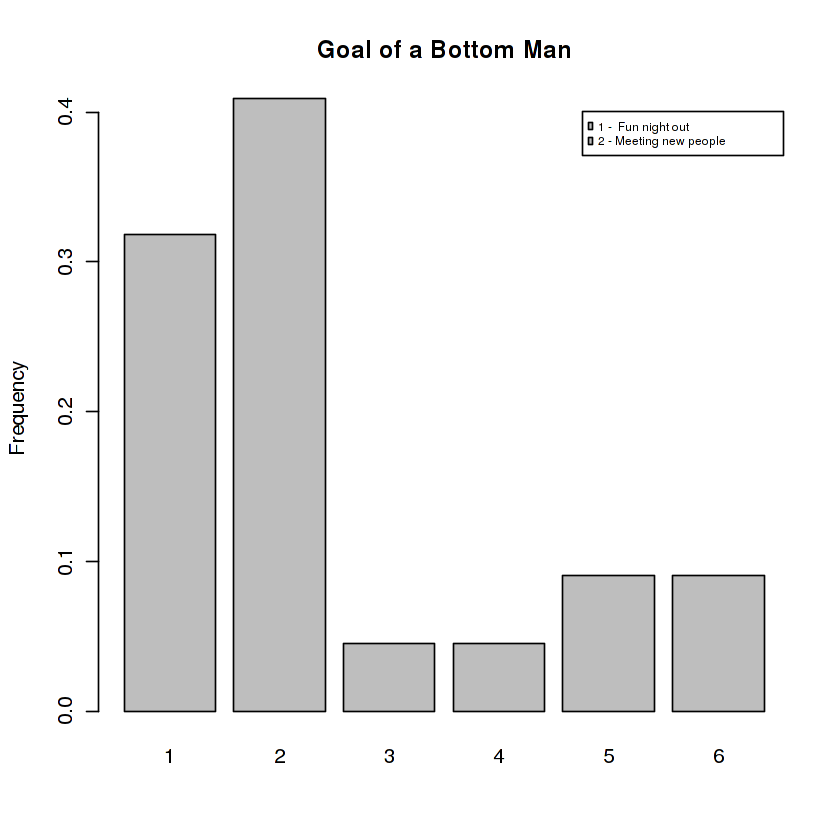

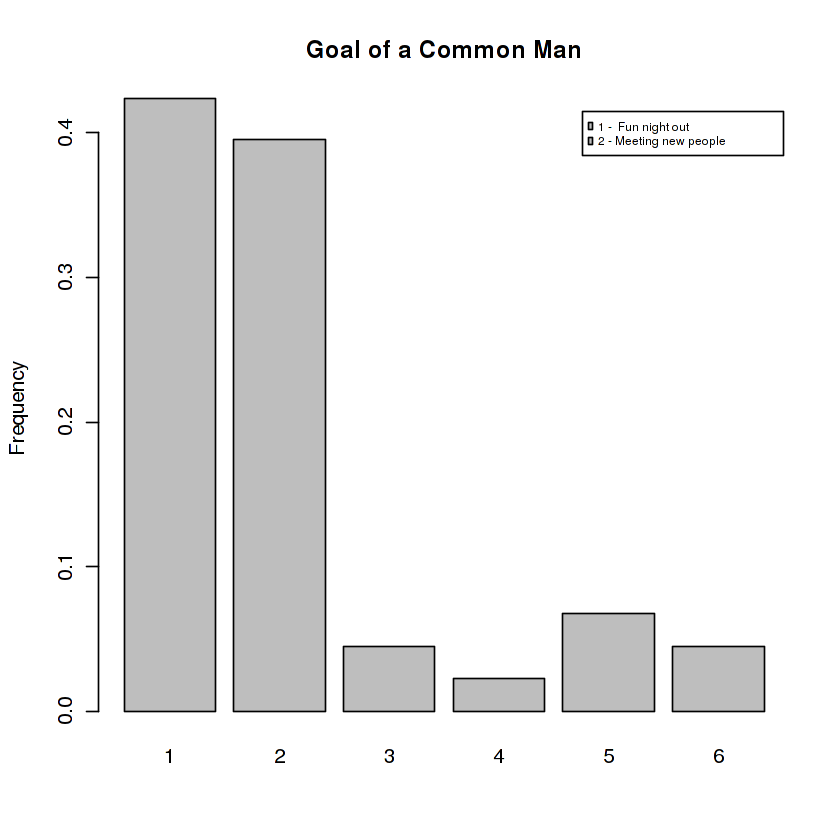

In [23]:
###############################
#Goals overview

barplot(prop.table(table(TopWoman$goal)), main="Goal of a Top Man", 
        legend.text = c("1 -  Fun night out" , "2 - Meeting new people"
        ), args.legend = list(text.width = 1.5, xjust = 1, cex = 0.58), ylab = "Frequency")
barplot(prop.table(table(BottomWoman$goal)), main="Goal of a Bottom Man", 
        legend.text = c("1 -  Fun night out" , "2 - Meeting new people"
        ), args.legend = list(text.width = 2, xjust = 1, cex = 0.58), ylab = "Frequency")
barplot(prop.table(table(CommonWoman$goal)), main="Goal of a Common Man",  
        legend.text = c("1 -  Fun night out" , "2 - Meeting new people"
        ), args.legend = list(text.width = 2, xjust = 1, cex = 0.58), ylab = "Frequency")

TopMen are more fun oriented. 

BottomMen take dating more seriously. 

Interests
---------
How interested are men in the following activities, on a scale of 1-10?


**Sports**

In [24]:
x = matrix(c(quantile(TopMan$sports, na.rm = TRUE)[1], 
             quantile(TopMan$sports, na.rm = TRUE)[2], quantile(TopMan$sports, na.rm = TRUE)[3],
             round(mean(na.omit(TopMan$sports)), digits = 2), 
             quantile(TopMan$sports, na.rm = TRUE)[4], quantile(TopMan$sports, na.rm = TRUE)[5],
             quantile(BottomMan$sports, na.rm = TRUE)[1], 
             quantile(BottomMan$sports, na.rm = TRUE)[2], quantile(BottomMan$sports, na.rm = TRUE)[3],
             round(mean(na.omit(BottomMan$sports)), digits = 2), 
             quantile(BottomMan$sports, na.rm = TRUE)[4], quantile(BottomMan$sports, na.rm = TRUE)[5],
             quantile(CommonMan$sports, na.rm = TRUE)[1], 
             quantile(CommonMan$sports, na.rm = TRUE)[2], quantile(CommonMan$sports, na.rm = TRUE)[3],
             round(mean(na.omit(CommonMan$sports)), digits = 2), 
             quantile(CommonMan$sports, na.rm = TRUE)[4], quantile(CommonMan$sports, na.rm = TRUE)[5]
), ncol = 6, byrow = TRUE)

colnames(x) = c("Min", "1st Quantile", "Median", "Mean", "3rd Quantile", "Max")
rownames(x) = c("TopMan", "BottomMan", "CommonMan")

x

,Min,1st Quantile,Median,Mean,3rd Quantile,Max
TopMan,3,7,8,7.80,10,10
BottomMan,1,3,5,5.11,7,9
CommonMan,1,6,8,7.21,9,10


BottomMen are less interested in sport than other men.

**Exercise**

In [25]:
x = matrix(c(quantile(TopMan$exercise, na.rm = TRUE)[1], 
             quantile(TopMan$exercise, na.rm = TRUE)[2], quantile(TopMan$exercise, na.rm = TRUE)[3],
             round(mean(na.omit(TopMan$exercise)), digits = 2), 
             quantile(TopMan$exercise, na.rm = TRUE)[4], quantile(TopMan$exercise, na.rm = TRUE)[5],
             quantile(BottomMan$exercise, na.rm = TRUE)[1], 
             quantile(BottomMan$exercise, na.rm = TRUE)[2], quantile(BottomMan$exercise, na.rm = TRUE)[3],
             round(mean(na.omit(BottomMan$exercise)), digits = 2), 
             quantile(BottomMan$exercise, na.rm = TRUE)[4], quantile(BottomMan$exercise, na.rm = TRUE)[5],
             quantile(CommonMan$exercise, na.rm = TRUE)[1], 
             quantile(CommonMan$exercise, na.rm = TRUE)[2], quantile(CommonMan$exercise, na.rm = TRUE)[3],
             round(mean(na.omit(CommonMan$exercise)), digits = 2), 
             quantile(CommonMan$exercise, na.rm = TRUE)[4], quantile(CommonMan$exercise, na.rm = TRUE)[5]
), ncol = 6, byrow = TRUE)

colnames(x) = c("Min", "1st Quantile", "Median", "Mean", "3rd Quantile", "Max")
rownames(x) = c("TopMan", "BottomMan", "CommonMan")

x

,Min,1st Quantile,Median,Mean,3rd Quantile,Max
TopMan,4,7,8,7.52,9.0,10
BottomMan,1,3,6,5.41,7.5,10
CommonMan,1,4,6,6.15,8.0,10


TopMen exercise significantly more than CommonMen.

BottomMen exercise a little bit less than CommonMen.

**Dining**

In [26]:
x = matrix(c(quantile(TopMan$dining, na.rm = TRUE)[1], 
             quantile(TopMan$dining, na.rm = TRUE)[2], quantile(TopMan$dining, na.rm = TRUE)[3],
             round(mean(na.omit(TopMan$dining)), digits = 2), 
             quantile(TopMan$dining, na.rm = TRUE)[4], quantile(TopMan$dining, na.rm = TRUE)[5],
             quantile(BottomMan$dining, na.rm = TRUE)[1], 
             quantile(BottomMan$dining, na.rm = TRUE)[2], quantile(BottomMan$dining, na.rm = TRUE)[3],
             round(mean(na.omit(BottomMan$dining)), digits = 2), 
             quantile(BottomMan$dining, na.rm = TRUE)[4], quantile(BottomMan$dining, na.rm = TRUE)[5],
             quantile(CommonMan$dining, na.rm = TRUE)[1], 
             quantile(CommonMan$dining, na.rm = TRUE)[2], quantile(CommonMan$dining, na.rm = TRUE)[3],
             round(mean(na.omit(CommonMan$dining)), digits = 2), 
             quantile(CommonMan$dining, na.rm = TRUE)[4], quantile(CommonMan$dining, na.rm = TRUE)[5]
), ncol = 6, byrow = TRUE)

colnames(x) = c("Min", "1st Quantile", "Median", "Mean", "3rd Quantile", "Max")
rownames(x) = c("TopMan", "BottomMan", "CommonMan")

x

,Min,1st Quantile,Median,Mean,3rd Quantile,Max
TopMan,5,8,8,8.32,9,10
BottomMan,1,6,8,7.07,8,10
CommonMan,1,6,8,7.35,9,10


TopMen like dining more than other men.

**Clubbing**

In [27]:
x = matrix(c(quantile(TopMan$clubbing, na.rm = TRUE)[1], 
             quantile(TopMan$clubbing, na.rm = TRUE)[2], quantile(TopMan$clubbing, na.rm = TRUE)[3],
             round(mean(na.omit(TopMan$clubbing)), digits = 2), 
             quantile(TopMan$clubbing, na.rm = TRUE)[4], quantile(TopMan$clubbing, na.rm = TRUE)[5],
             quantile(BottomMan$clubbing, na.rm = TRUE)[1], 
             quantile(BottomMan$clubbing, na.rm = TRUE)[2], quantile(BottomMan$clubbing, na.rm = TRUE)[3],
             round(mean(na.omit(BottomMan$clubbing)), digits = 2), 
             quantile(BottomMan$clubbing, na.rm = TRUE)[4], quantile(BottomMan$clubbing, na.rm = TRUE)[5],
             quantile(CommonMan$clubbing, na.rm = TRUE)[1], 
             quantile(CommonMan$clubbing, na.rm = TRUE)[2], quantile(CommonMan$clubbing, na.rm = TRUE)[3],
             round(mean(na.omit(CommonMan$clubbing)), digits = 2), 
             quantile(CommonMan$clubbing, na.rm = TRUE)[4], quantile(CommonMan$clubbing, na.rm = TRUE)[5]
), ncol = 6, byrow = TRUE)

colnames(x) = c("Min", "1st Quantile", "Median", "Mean", "3rd Quantile", "Max")
rownames(x) = c("TopMan", "BottomMan", "CommonMan")

x

,Min,1st Quantile,Median,Mean,3rd Quantile,Max
TopMan,1,4,8,6.52,9,10
BottomMan,1,3,5,4.89,7,9
CommonMan,0,4,6,5.57,8,10


Top Men like clubbing more than CommonMen.

BottomMen like clubbing less than CommonMen.


**TV**

In [28]:
x = matrix(c(quantile(TopMan$tv, na.rm = TRUE)[1], 
             quantile(TopMan$tv, na.rm = TRUE)[2], quantile(TopMan$tv, na.rm = TRUE)[3],
             round(mean(na.omit(TopMan$tv)), digits = 2), 
             quantile(TopMan$tv, na.rm = TRUE)[4], quantile(TopMan$tv, na.rm = TRUE)[5],
             quantile(BottomMan$tv, na.rm = TRUE)[1], 
             quantile(BottomMan$tv, na.rm = TRUE)[2], quantile(BottomMan$tv, na.rm = TRUE)[3],
             round(mean(na.omit(BottomMan$tv)), digits = 2), 
             quantile(BottomMan$tv, na.rm = TRUE)[4], quantile(BottomMan$tv, na.rm = TRUE)[5],
             quantile(CommonMan$tv, na.rm = TRUE)[1], 
             quantile(CommonMan$tv, na.rm = TRUE)[2], quantile(CommonMan$tv, na.rm = TRUE)[3],
             round(mean(na.omit(CommonMan$tv)), digits = 2), 
             quantile(CommonMan$tv, na.rm = TRUE)[4], quantile(CommonMan$tv, na.rm = TRUE)[5]
), ncol = 6, byrow = TRUE)

colnames(x) = c("Min", "1st Quantile", "Median", "Mean", "3rd Quantile", "Max")
rownames(x) = c("TopMan", "BottomMan", "CommonMan")

x

,Min,1st Quantile,Median,Mean,3rd Quantile,Max
TopMan,1,2.0,3,3.60,5.0,10
BottomMan,1,2.5,6,4.78,6.5,8
CommonMan,1,3.0,5,5.09,7.0,10


TopMen like watching tv less than other men. 

**Concerts**

In [29]:
x = matrix(c(quantile(TopMan$concerts, na.rm = TRUE)[1], 
             quantile(TopMan$concerts, na.rm = TRUE)[2], quantile(TopMan$concerts, na.rm = TRUE)[3],
             round(mean(na.omit(TopMan$concerts)), digits = 2), 
             quantile(TopMan$concerts, na.rm = TRUE)[4], quantile(TopMan$concerts, na.rm = TRUE)[5],
             quantile(BottomMan$concerts, na.rm = TRUE)[1], 
             quantile(BottomMan$concerts, na.rm = TRUE)[2], quantile(BottomMan$concerts, na.rm = TRUE)[3],
             round(mean(na.omit(BottomMan$concerts)), digits = 2), 
             quantile(BottomMan$concerts, na.rm = TRUE)[4], quantile(BottomMan$concerts, na.rm = TRUE)[5],
             quantile(CommonMan$concerts, na.rm = TRUE)[1], 
             quantile(CommonMan$concerts, na.rm = TRUE)[2], quantile(CommonMan$concerts, na.rm = TRUE)[3],
             round(mean(na.omit(CommonMan$concerts)), digits = 2), 
             quantile(CommonMan$concerts, na.rm = TRUE)[4], quantile(CommonMan$concerts, na.rm = TRUE)[5]
), ncol = 6, byrow = TRUE)

colnames(x) = c("Min", "1st Quantile", "Median", "Mean", "3rd Quantile", "Max")
rownames(x) = c("TopMan", "BottomMan", "CommonMan")

x

,Min,1st Quantile,Median,Mean,3rd Quantile,Max
TopMan,2,6,7,6.96,9,10
BottomMan,2,5,7,6.52,8,10
CommonMan,0,5,7,6.50,8,10


TopMen like concerts a little bit more than other men.

**Yoga**

In [30]:
x = matrix(c(quantile(TopMan$yoga, na.rm = TRUE)[1], 
             quantile(TopMan$yoga, na.rm = TRUE)[2], quantile(TopMan$yoga, na.rm = TRUE)[3],
             round(mean(na.omit(TopMan$yoga)), digits = 2), 
             quantile(TopMan$yoga, na.rm = TRUE)[4], quantile(TopMan$yoga, na.rm = TRUE)[5],
             quantile(BottomMan$yoga, na.rm = TRUE)[1], 
             quantile(BottomMan$yoga, na.rm = TRUE)[2], quantile(BottomMan$yoga, na.rm = TRUE)[3],
             round(mean(na.omit(BottomMan$yoga)), digits = 2), 
             quantile(BottomMan$yoga, na.rm = TRUE)[4], quantile(BottomMan$yoga, na.rm = TRUE)[5],
             quantile(CommonMan$yoga, na.rm = TRUE)[1], 
             quantile(CommonMan$yoga, na.rm = TRUE)[2], quantile(CommonMan$yoga, na.rm = TRUE)[3],
             round(mean(na.omit(CommonMan$yoga)), digits = 2), 
             quantile(CommonMan$yoga, na.rm = TRUE)[4], quantile(CommonMan$yoga, na.rm = TRUE)[5]
), ncol = 6, byrow = TRUE)

colnames(x) = c("Min", "1st Quantile", "Median", "Mean", "3rd Quantile", "Max")
rownames(x) = c("TopMan", "BottomMan", "CommonMan")

x

,Min,1st Quantile,Median,Mean,3rd Quantile,Max
TopMan,1,2,5,4.68,7,10
BottomMan,1,1,3,3.70,6,9
CommonMan,0,1,3,3.67,5,10


TopMen like yoga more than other men.


Conclusions
===========

Popular man is 

 - European
 - studies Business
 - treats speed dating as a fun event
 - likes sports and exercising
 - is more social (likes clubbing and dining, does not enjoy watching
   tv)
 - and has more femine interest (concerts, yoga) than other men

Unpopular man is 

 - European or Asian
 - does not like physical activity
 - and is less social.

 